In [1]:
import tensorflow as tf
import manager.dataset_manager as dm
import trade_dao as dao
import os
import numpy as np
import requests
import json
import matplotlib.pyplot as plt


In [2]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
url = "http://localhost:5000/dataset"
response = requests.get(url)
jresponse = (
    "{}".content.decode("utf-8")
    if response in (None, "")
    else json.loads(response.content.decode("utf-8"))
)


In [4]:
pixels = np.array(jresponse["pixels"])
labels = np.array(jresponse["labels"])
dates = jresponse["dates"]


In [6]:
train_pixels, test_pixels = pixels[:30000], pixels[30000:]
train_labels, test_labels = labels[:30000], labels[30000:]

In [7]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(dm.PIXEL_HEIGHT, dm.PIXEL_WIDTH)),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(2),
    ]
)

predictions = model(train_pixels[:1]).numpy()
predictions

tf.nn.softmax(predictions).numpy()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(train_labels[:1], predictions).numpy()



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



1.7323443

In [8]:
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [9]:
model.fit(train_pixels, train_labels, epochs=20)

Train on 30000 samples
Epoch 1/20


   32/30000 [..............................] - ETA: 24:02 - loss: 3.6262 - accuracy: 0.5312

  384/30000 [..............................] - ETA: 2:02 - loss: 6.1982 - accuracy: 0.5365 

  832/30000 [..............................] - ETA: 57s - loss: 4.8586 - accuracy: 0.5312 

 1216/30000 [>.............................] - ETA: 40s - loss: 4.2441 - accuracy: 0.5452

 1632/30000 [>.............................] - ETA: 30s - loss: 3.9150 - accuracy: 0.5490

 2080/30000 [=>............................] - ETA: 24s - loss: 3.5543 - accuracy: 0.5486

 2560/30000 [=>............................] - ETA: 19s - loss: 3.2426 - accuracy: 0.5613

 3008/30000 [==>...........................] - ETA: 17s - loss: 3.0883 - accuracy: 0.5625

 3488/30000 [==>...........................] - ETA: 14s - loss: 2.9631 - accuracy: 0.5634

 3968/30000 [==>...........................] - ETA: 13s - loss: 3.0363 - accuracy: 0.5653

 4448/30000 [===>..........................] - ETA: 11s - loss: 3.1799 - accuracy: 0.5616

 4928/30000 [===>..........................] - ETA: 10s - loss: 3.1042 - accuracy: 0.5633

 5440/30000 [====>.........................] - ETA: 9s - loss: 3.0591 - accuracy: 0.5645 

 5792/30000 [====>.........................] - ETA: 9s - loss: 3.0131 - accuracy: 0.5680

 6272/30000 [=====>........................] - ETA: 8s - loss: 2.9093 - accuracy: 0.5673

 6752/30000 [=====>........................] - ETA: 8s - loss: 2.8149 - accuracy: 0.5680

 7232/30000 [======>.......................] - ETA: 7s - loss: 2.7127 - accuracy: 0.5713

 7744/30000 [======>.......................] - ETA: 6s - loss: 2.7078 - accuracy: 0.5732

 8160/30000 [=======>......................] - ETA: 6s - loss: 2.6947 - accuracy: 0.5743

 8640/30000 [=======>......................] - ETA: 6s - loss: 2.6174 - accuracy: 0.5774

 9056/30000 [========>.....................] - ETA: 5s - loss: 2.5645 - accuracy: 0.5796

 9536/30000 [========>.....................] - ETA: 5s - loss: 2.5389 - accuracy: 0.5803

10016/30000 [=========>....................] - ETA: 5s - loss: 2.5608 - accuracy: 0.5820

10496/30000 [=========>....................] - ETA: 5s - loss: 2.5166 - accuracy: 0.5815

10976/30000 [=========>....................] - ETA: 4s - loss: 2.5259 - accuracy: 0.5813

11456/30000 [==========>...................] - ETA: 4s - loss: 2.5255 - accuracy: 0.5834

11904/30000 [==========>...................] - ETA: 4s - loss: 2.5281 - accuracy: 0.5828

12352/30000 [===========>..................] - ETA: 4s - loss: 2.4825 - accuracy: 0.5846

12736/30000 [===========>..................] - ETA: 4s - loss: 2.4522 - accuracy: 0.5848

13024/30000 [============>.................] - ETA: 3s - loss: 2.4426 - accuracy: 0.5856

13440/30000 [============>.................] - ETA: 3s - loss: 2.4678 - accuracy: 0.5873

13760/30000 [============>.................] - ETA: 3s - loss: 2.4431 - accuracy: 0.5873

14208/30000 [=============>................] - ETA: 3s - loss: 2.4364 - accuracy: 0.5862

14656/30000 [=============>................] - ETA: 3s - loss: 2.4125 - accuracy: 0.5854

15104/30000 [==============>...............] - ETA: 3s - loss: 2.3953 - accuracy: 0.5863

15616/30000 [==============>...............] - ETA: 3s - loss: 2.3841 - accuracy: 0.5869

16096/30000 [===============>..............] - ETA: 2s - loss: 2.3617 - accuracy: 0.5877

16512/30000 [===============>..............] - ETA: 2s - loss: 2.3550 - accuracy: 0.5883

16960/30000 [===============>..............] - ETA: 2s - loss: 2.3355 - accuracy: 0.5892

17312/30000 [================>.............] - ETA: 2s - loss: 2.3440 - accuracy: 0.5890

17728/30000 [================>.............] - ETA: 2s - loss: 2.3209 - accuracy: 0.5896

18176/30000 [=================>............] - ETA: 2s - loss: 2.2996 - accuracy: 0.5887

18624/30000 [=================>............] - ETA: 2s - loss: 2.2704 - accuracy: 0.5892

19104/30000 [==================>...........] - ETA: 2s - loss: 2.2428 - accuracy: 0.5896

19584/30000 [==================>...........] - ETA: 2s - loss: 2.2219 - accuracy: 0.5901

20064/30000 [===================>..........] - ETA: 1s - loss: 2.2124 - accuracy: 0.5900

20544/30000 [===================>..........] - ETA: 1s - loss: 2.1968 - accuracy: 0.5921

20960/30000 [===================>..........] - ETA: 1s - loss: 2.1820 - accuracy: 0.5930

21408/30000 [====================>.........] - ETA: 1s - loss: 2.1756 - accuracy: 0.5938

21856/30000 [====================>.........] - ETA: 1s - loss: 2.1601 - accuracy: 0.5946

22336/30000 [=====================>........] - ETA: 1s - loss: 2.1370 - accuracy: 0.5952

22816/30000 [=====================>........] - ETA: 1s - loss: 2.1294 - accuracy: 0.5961

23328/30000 [======================>.......] - ETA: 1s - loss: 2.1065 - accuracy: 0.5963

23840/30000 [======================>.......] - ETA: 1s - loss: 2.0948 - accuracy: 0.5983

24352/30000 [=======================>......] - ETA: 1s - loss: 2.0749 - accuracy: 0.5986

24864/30000 [=======================>......] - ETA: 0s - loss: 2.0592 - accuracy: 0.5993

25312/30000 [========================>.....] - ETA: 0s - loss: 2.0441 - accuracy: 0.5994

25792/30000 [========================>.....] - ETA: 0s - loss: 2.0273 - accuracy: 0.5999

26208/30000 [=========================>....] - ETA: 0s - loss: 2.0251 - accuracy: 0.6007

26592/30000 [=========================>....] - ETA: 0s - loss: 2.0263 - accuracy: 0.6008

27040/30000 [==========================>...] - ETA: 0s - loss: 2.0241 - accuracy: 0.6006

27456/30000 [==========================>...] - ETA: 0s - loss: 2.0059 - accuracy: 0.6010

27936/30000 [==========================>...] - ETA: 0s - loss: 1.9891 - accuracy: 0.6018

28384/30000 [===========================>..] - ETA: 0s - loss: 1.9816 - accuracy: 0.6026

28896/30000 [===========================>..] - ETA: 0s - loss: 1.9639 - accuracy: 0.6027

29344/30000 [============================>.] - ETA: 0s - loss: 1.9617 - accuracy: 0.6024

29856/30000 [============================>.] - ETA: 0s - loss: 1.9458 - accuracy: 0.6026

30000/30000 [==============================] - 5s 166us/sample - loss: 1.9417 - accuracy: 0.6028


Epoch 2/20
   32/30000 [..............................] - ETA: 4s - loss: 0.6865 - accuracy: 0.4688

  480/30000 [..............................] - ETA: 3s - loss: 1.1212 - accuracy: 0.6271

  992/30000 [..............................] - ETA: 3s - loss: 1.0781 - accuracy: 0.6270

 1408/30000 [>.............................] - ETA: 3s - loss: 1.8319 - accuracy: 0.6271

 1888/30000 [>.............................] - ETA: 3s - loss: 1.6450 - accuracy: 0.6261

 2400/30000 [=>............................] - ETA: 3s - loss: 1.4779 - accuracy: 0.6267

 2944/30000 [=>............................] - ETA: 2s - loss: 1.3278 - accuracy: 0.6338

 3456/30000 [==>...........................] - ETA: 2s - loss: 1.2238 - accuracy: 0.6427

 3840/30000 [==>...........................] - ETA: 2s - loss: 1.1684 - accuracy: 0.6451

 4256/30000 [===>..........................] - ETA: 2s - loss: 1.1540 - accuracy: 0.6466

 4768/30000 [===>..........................] - ETA: 2s - loss: 1.1861 - accuracy: 0.6464

 5216/30000 [====>.........................] - ETA: 2s - loss: 1.1461 - accuracy: 0.6486

 5632/30000 [====>.........................] - ETA: 2s - loss: 1.1578 - accuracy: 0.6456

 6016/30000 [=====>........................] - ETA: 2s - loss: 1.1364 - accuracy: 0.6458

 6432/30000 [=====>........................] - ETA: 2s - loss: 1.1287 - accuracy: 0.6457

 6912/30000 [=====>........................] - ETA: 2s - loss: 1.1131 - accuracy: 0.6454

 7360/30000 [======>.......................] - ETA: 2s - loss: 1.0981 - accuracy: 0.6501

 7808/30000 [======>.......................] - ETA: 2s - loss: 1.0826 - accuracy: 0.6507

 8224/30000 [=======>......................] - ETA: 2s - loss: 1.0857 - accuracy: 0.6493

 8672/30000 [=======>......................] - ETA: 2s - loss: 1.0608 - accuracy: 0.6511

 9120/30000 [========>.....................] - ETA: 2s - loss: 1.0404 - accuracy: 0.6513

 9600/30000 [========>.....................] - ETA: 2s - loss: 1.0257 - accuracy: 0.6505

10048/30000 [=========>....................] - ETA: 2s - loss: 1.0137 - accuracy: 0.6503

10496/30000 [=========>....................] - ETA: 2s - loss: 1.0021 - accuracy: 0.6506

10944/30000 [=========>....................] - ETA: 2s - loss: 0.9938 - accuracy: 0.6498

11424/30000 [==========>...................] - ETA: 2s - loss: 0.9875 - accuracy: 0.6494

11904/30000 [==========>...................] - ETA: 2s - loss: 1.0131 - accuracy: 0.6494

12416/30000 [===========>..................] - ETA: 1s - loss: 1.0007 - accuracy: 0.6494

12928/30000 [===========>..................] - ETA: 1s - loss: 0.9998 - accuracy: 0.6491

13376/30000 [============>.................] - ETA: 1s - loss: 0.9881 - accuracy: 0.6494

13824/30000 [============>.................] - ETA: 1s - loss: 0.9800 - accuracy: 0.6501

14176/30000 [=============>................] - ETA: 1s - loss: 0.9776 - accuracy: 0.6505

14624/30000 [=============>................] - ETA: 1s - loss: 0.9707 - accuracy: 0.6504

15072/30000 [==============>...............] - ETA: 1s - loss: 0.9736 - accuracy: 0.6503

15520/30000 [==============>...............] - ETA: 1s - loss: 0.9703 - accuracy: 0.6512

15968/30000 [==============>...............] - ETA: 1s - loss: 0.9633 - accuracy: 0.6514

16416/30000 [===============>..............] - ETA: 1s - loss: 1.0723 - accuracy: 0.6510

16864/30000 [===============>..............] - ETA: 1s - loss: 1.0637 - accuracy: 0.6513

17280/30000 [================>.............] - ETA: 1s - loss: 1.0578 - accuracy: 0.6509

17728/30000 [================>.............] - ETA: 1s - loss: 1.0487 - accuracy: 0.6499

17760/30000 [================>.............] - ETA: 1s - loss: 1.0480 - accuracy: 0.6498

18208/30000 [=================>............] - ETA: 1s - loss: 1.0410 - accuracy: 0.6500

18656/30000 [=================>............] - ETA: 1s - loss: 1.0400 - accuracy: 0.6501

19072/30000 [==================>...........] - ETA: 1s - loss: 1.0334 - accuracy: 0.6504

19488/30000 [==================>...........] - ETA: 1s - loss: 1.0341 - accuracy: 0.6506

19968/30000 [==================>...........] - ETA: 1s - loss: 1.0273 - accuracy: 0.6504

20416/30000 [===================>..........] - ETA: 1s - loss: 1.0234 - accuracy: 0.6505

20864/30000 [===================>..........] - ETA: 1s - loss: 1.0184 - accuracy: 0.6508

21312/30000 [====================>.........] - ETA: 1s - loss: 1.0126 - accuracy: 0.6510

21760/30000 [====================>.........] - ETA: 1s - loss: 1.0061 - accuracy: 0.6504

22176/30000 [=====================>........] - ETA: 1s - loss: 1.0067 - accuracy: 0.6501

22624/30000 [=====================>........] - ETA: 0s - loss: 1.0017 - accuracy: 0.6498

22976/30000 [=====================>........] - ETA: 0s - loss: 0.9971 - accuracy: 0.6497

23424/30000 [======================>.......] - ETA: 0s - loss: 0.9953 - accuracy: 0.6497

23904/30000 [======================>.......] - ETA: 0s - loss: 0.9893 - accuracy: 0.6488

24384/30000 [=======================>......] - ETA: 0s - loss: 0.9955 - accuracy: 0.6489

24864/30000 [=======================>......] - ETA: 0s - loss: 1.0030 - accuracy: 0.6493

25344/30000 [========================>.....] - ETA: 0s - loss: 1.0006 - accuracy: 0.6490

25856/30000 [========================>.....] - ETA: 0s - loss: 0.9956 - accuracy: 0.6491

26080/30000 [=========================>....] - ETA: 0s - loss: 1.0043 - accuracy: 0.6488

26560/30000 [=========================>....] - ETA: 0s - loss: 1.0003 - accuracy: 0.6490

26944/30000 [=========================>....] - ETA: 0s - loss: 0.9968 - accuracy: 0.6487

27328/30000 [==========================>...] - ETA: 0s - loss: 0.9925 - accuracy: 0.6486

27776/30000 [==========================>...] - ETA: 0s - loss: 0.9902 - accuracy: 0.6484

28256/30000 [===========================>..] - ETA: 0s - loss: 0.9878 - accuracy: 0.6483

28672/30000 [===========================>..] - ETA: 0s - loss: 0.9827 - accuracy: 0.6488

29120/30000 [============================>.] - ETA: 0s - loss: 0.9796 - accuracy: 0.6486

29568/30000 [============================>.] - ETA: 0s - loss: 0.9742 - accuracy: 0.6492

30000/30000 [==============================] - 4s 131us/sample - loss: 0.9687 - accuracy: 0.6496


Epoch 3/20
   32/30000 [..............................] - ETA: 4s - loss: 0.6389 - accuracy: 0.6875

  480/30000 [..............................] - ETA: 3s - loss: 0.7664 - accuracy: 0.6542

  928/30000 [..............................] - ETA: 3s - loss: 0.7607 - accuracy: 0.6562

 1376/30000 [>.............................] - ETA: 3s - loss: 0.7108 - accuracy: 0.6664

 1824/30000 [>.............................] - ETA: 3s - loss: 0.7789 - accuracy: 0.6672

 2272/30000 [=>............................] - ETA: 3s - loss: 0.7807 - accuracy: 0.6629

 2752/30000 [=>............................] - ETA: 3s - loss: 0.7807 - accuracy: 0.6664

 3232/30000 [==>...........................] - ETA: 3s - loss: 0.7823 - accuracy: 0.6736

 3584/30000 [==>...........................] - ETA: 3s - loss: 0.7703 - accuracy: 0.6733

 3776/30000 [==>...........................] - ETA: 4s - loss: 0.7693 - accuracy: 0.6719

 4192/30000 [===>..........................] - ETA: 3s - loss: 0.7584 - accuracy: 0.6760

 4544/30000 [===>..........................] - ETA: 3s - loss: 0.7552 - accuracy: 0.6743

 4960/30000 [===>..........................] - ETA: 3s - loss: 0.7574 - accuracy: 0.6728

 5280/30000 [====>.........................] - ETA: 3s - loss: 0.8272 - accuracy: 0.6712

 5696/30000 [====>.........................] - ETA: 3s - loss: 0.8128 - accuracy: 0.6698

 6176/30000 [=====>........................] - ETA: 3s - loss: 0.7987 - accuracy: 0.6695

 6624/30000 [=====>........................] - ETA: 3s - loss: 0.7949 - accuracy: 0.6706

 7104/30000 [======>.......................] - ETA: 3s - loss: 0.7870 - accuracy: 0.6703

 7552/30000 [======>.......................] - ETA: 3s - loss: 0.7828 - accuracy: 0.6713

 8000/30000 [=======>......................] - ETA: 3s - loss: 0.7848 - accuracy: 0.6702

 8448/30000 [=======>......................] - ETA: 3s - loss: 0.7784 - accuracy: 0.6669

 8832/30000 [=======>......................] - ETA: 3s - loss: 0.7827 - accuracy: 0.6679

 9248/30000 [========>.....................] - ETA: 2s - loss: 0.7744 - accuracy: 0.6701

 9696/30000 [========>.....................] - ETA: 2s - loss: 0.7737 - accuracy: 0.6722

10144/30000 [=========>....................] - ETA: 2s - loss: 0.7749 - accuracy: 0.6717

10560/30000 [=========>....................] - ETA: 2s - loss: 0.7748 - accuracy: 0.6715

11040/30000 [==========>...................] - ETA: 2s - loss: 0.7675 - accuracy: 0.6727

11488/30000 [==========>...................] - ETA: 2s - loss: 0.7616 - accuracy: 0.6731

11968/30000 [==========>...................] - ETA: 2s - loss: 0.7556 - accuracy: 0.6724

12256/30000 [===========>..................] - ETA: 2s - loss: 0.7561 - accuracy: 0.6726

12640/30000 [===========>..................] - ETA: 2s - loss: 0.7611 - accuracy: 0.6723

13056/30000 [============>.................] - ETA: 2s - loss: 0.7564 - accuracy: 0.6732

13536/30000 [============>.................] - ETA: 2s - loss: 0.7509 - accuracy: 0.6733

14016/30000 [=============>................] - ETA: 2s - loss: 0.7486 - accuracy: 0.6735

14464/30000 [=============>................] - ETA: 2s - loss: 0.7432 - accuracy: 0.6739

14816/30000 [=============>................] - ETA: 2s - loss: 0.7556 - accuracy: 0.6742

15296/30000 [==============>...............] - ETA: 1s - loss: 0.7549 - accuracy: 0.6733

15776/30000 [==============>...............] - ETA: 1s - loss: 0.7832 - accuracy: 0.6731

16224/30000 [===============>..............] - ETA: 1s - loss: 0.7799 - accuracy: 0.6731

16672/30000 [===============>..............] - ETA: 1s - loss: 0.7797 - accuracy: 0.6727

17056/30000 [================>.............] - ETA: 1s - loss: 0.7780 - accuracy: 0.6724

17504/30000 [================>.............] - ETA: 1s - loss: 0.7760 - accuracy: 0.6720

17984/30000 [================>.............] - ETA: 1s - loss: 0.7748 - accuracy: 0.6713

18464/30000 [=================>............] - ETA: 1s - loss: 0.7788 - accuracy: 0.6704

18912/30000 [=================>............] - ETA: 1s - loss: 0.7774 - accuracy: 0.6706

19360/30000 [==================>...........] - ETA: 1s - loss: 0.7731 - accuracy: 0.6714

19776/30000 [==================>...........] - ETA: 1s - loss: 0.7723 - accuracy: 0.6714

20256/30000 [===================>..........] - ETA: 1s - loss: 0.7735 - accuracy: 0.6712

20672/30000 [===================>..........] - ETA: 1s - loss: 0.7722 - accuracy: 0.6709

21088/30000 [====================>.........] - ETA: 1s - loss: 0.7707 - accuracy: 0.6706

21440/30000 [====================>.........] - ETA: 1s - loss: 0.7724 - accuracy: 0.6706

21696/30000 [====================>.........] - ETA: 1s - loss: 0.7705 - accuracy: 0.6701

22016/30000 [=====================>........] - ETA: 1s - loss: 0.7780 - accuracy: 0.6700

22400/30000 [=====================>........] - ETA: 0s - loss: 0.7803 - accuracy: 0.6697

22880/30000 [=====================>........] - ETA: 0s - loss: 0.7802 - accuracy: 0.6685

23360/30000 [======================>.......] - ETA: 0s - loss: 0.7816 - accuracy: 0.6679

23808/30000 [======================>.......] - ETA: 0s - loss: 0.7791 - accuracy: 0.6676

24256/30000 [=======================>......] - ETA: 0s - loss: 0.7785 - accuracy: 0.6670

24736/30000 [=======================>......] - ETA: 0s - loss: 0.7777 - accuracy: 0.6674

25216/30000 [========================>.....] - ETA: 0s - loss: 0.7769 - accuracy: 0.6675

25664/30000 [========================>.....] - ETA: 0s - loss: 0.7880 - accuracy: 0.6678

26208/30000 [=========================>....] - ETA: 0s - loss: 0.7858 - accuracy: 0.6681

26720/30000 [=========================>....] - ETA: 0s - loss: 0.7865 - accuracy: 0.6676

27200/30000 [==========================>...] - ETA: 0s - loss: 0.7893 - accuracy: 0.6675

27680/30000 [==========================>...] - ETA: 0s - loss: 0.7895 - accuracy: 0.6671

28128/30000 [===========================>..] - ETA: 0s - loss: 0.8057 - accuracy: 0.6671

28608/30000 [===========================>..] - ETA: 0s - loss: 0.8044 - accuracy: 0.6668

29056/30000 [============================>.] - ETA: 0s - loss: 0.8083 - accuracy: 0.6664

29472/30000 [============================>.] - ETA: 0s - loss: 0.8092 - accuracy: 0.6666

29632/30000 [============================>.] - ETA: 0s - loss: 0.8081 - accuracy: 0.6670

29792/30000 [============================>.] - ETA: 0s - loss: 0.8080 - accuracy: 0.6671

30000/30000 [==============================] - 4s 143us/sample - loss: 0.8093 - accuracy: 0.6672


Epoch 4/20
   32/30000 [..............................] - ETA: 3s - loss: 0.4767 - accuracy: 0.6875

  480/30000 [..............................] - ETA: 3s - loss: 0.9705 - accuracy: 0.6708

  896/30000 [..............................] - ETA: 3s - loss: 0.8439 - accuracy: 0.6908

 1408/30000 [>.............................] - ETA: 3s - loss: 0.8206 - accuracy: 0.6776

 1920/30000 [>.............................] - ETA: 3s - loss: 0.8486 - accuracy: 0.6740

 2400/30000 [=>............................] - ETA: 3s - loss: 0.8581 - accuracy: 0.6762

 2880/30000 [=>............................] - ETA: 2s - loss: 0.8241 - accuracy: 0.6760

 3264/30000 [==>...........................] - ETA: 2s - loss: 0.8138 - accuracy: 0.6798

 3712/30000 [==>...........................] - ETA: 2s - loss: 0.7876 - accuracy: 0.6808

 4192/30000 [===>..........................] - ETA: 2s - loss: 0.8164 - accuracy: 0.6801

 4672/30000 [===>..........................] - ETA: 2s - loss: 0.8549 - accuracy: 0.6809

 5152/30000 [====>.........................] - ETA: 2s - loss: 0.8372 - accuracy: 0.6811

 5600/30000 [====>.........................] - ETA: 2s - loss: 0.8283 - accuracy: 0.6802

 6080/30000 [=====>........................] - ETA: 2s - loss: 0.8180 - accuracy: 0.6789

 6528/30000 [=====>........................] - ETA: 2s - loss: 0.8210 - accuracy: 0.6785

 7008/30000 [======>.......................] - ETA: 2s - loss: 0.8267 - accuracy: 0.6785

 7488/30000 [======>.......................] - ETA: 2s - loss: 0.8129 - accuracy: 0.6780

 7936/30000 [======>.......................] - ETA: 2s - loss: 0.8088 - accuracy: 0.6758

 8352/30000 [=======>......................] - ETA: 2s - loss: 0.8081 - accuracy: 0.6758

 8768/30000 [=======>......................] - ETA: 2s - loss: 0.8196 - accuracy: 0.6738

 9216/30000 [========>.....................] - ETA: 2s - loss: 0.8130 - accuracy: 0.6731

 9600/30000 [========>.....................] - ETA: 2s - loss: 0.8156 - accuracy: 0.6742

10112/30000 [=========>....................] - ETA: 2s - loss: 0.8368 - accuracy: 0.6740

10528/30000 [=========>....................] - ETA: 2s - loss: 0.8395 - accuracy: 0.6743

11008/30000 [==========>...................] - ETA: 2s - loss: 0.8315 - accuracy: 0.6726

11456/30000 [==========>...................] - ETA: 2s - loss: 0.8461 - accuracy: 0.6731

11872/30000 [==========>...................] - ETA: 2s - loss: 0.8402 - accuracy: 0.6728

12256/30000 [===========>..................] - ETA: 2s - loss: 0.8551 - accuracy: 0.6726

12736/30000 [===========>..................] - ETA: 1s - loss: 0.8488 - accuracy: 0.6733

13216/30000 [============>.................] - ETA: 1s - loss: 0.8467 - accuracy: 0.6735

13696/30000 [============>.................] - ETA: 1s - loss: 0.8370 - accuracy: 0.6737

14144/30000 [=============>................] - ETA: 1s - loss: 0.8304 - accuracy: 0.6743

14592/30000 [=============>................] - ETA: 1s - loss: 0.8302 - accuracy: 0.6743

15072/30000 [==============>...............] - ETA: 1s - loss: 0.8670 - accuracy: 0.6758

15520/30000 [==============>...............] - ETA: 1s - loss: 0.8662 - accuracy: 0.6747

15968/30000 [==============>...............] - ETA: 1s - loss: 0.8703 - accuracy: 0.6736

16448/30000 [===============>..............] - ETA: 1s - loss: 0.8676 - accuracy: 0.6742

16896/30000 [===============>..............] - ETA: 1s - loss: 0.8826 - accuracy: 0.6740

17280/30000 [================>.............] - ETA: 1s - loss: 0.8932 - accuracy: 0.6741

17664/30000 [================>.............] - ETA: 1s - loss: 0.9117 - accuracy: 0.6734

17984/30000 [================>.............] - ETA: 1s - loss: 0.9148 - accuracy: 0.6735

18464/30000 [=================>............] - ETA: 1s - loss: 0.9297 - accuracy: 0.6731

18912/30000 [=================>............] - ETA: 1s - loss: 0.9595 - accuracy: 0.6720

19328/30000 [==================>...........] - ETA: 1s - loss: 0.9816 - accuracy: 0.6715

19776/30000 [==================>...........] - ETA: 1s - loss: 0.9807 - accuracy: 0.6707

20256/30000 [===================>..........] - ETA: 1s - loss: 0.9728 - accuracy: 0.6707

20672/30000 [===================>..........] - ETA: 1s - loss: 0.9662 - accuracy: 0.6702

21184/30000 [====================>.........] - ETA: 1s - loss: 0.9596 - accuracy: 0.6702

21568/30000 [====================>.........] - ETA: 0s - loss: 0.9556 - accuracy: 0.6708

22048/30000 [=====================>........] - ETA: 0s - loss: 0.9486 - accuracy: 0.6709

22496/30000 [=====================>........] - ETA: 0s - loss: 0.9433 - accuracy: 0.6711

22944/30000 [=====================>........] - ETA: 0s - loss: 0.9390 - accuracy: 0.6712

23424/30000 [======================>.......] - ETA: 0s - loss: 0.9349 - accuracy: 0.6710

23904/30000 [======================>.......] - ETA: 0s - loss: 0.9292 - accuracy: 0.6707

24416/30000 [=======================>......] - ETA: 0s - loss: 0.9260 - accuracy: 0.6705

24928/30000 [=======================>......] - ETA: 0s - loss: 0.9331 - accuracy: 0.6702

25344/30000 [========================>.....] - ETA: 0s - loss: 0.9293 - accuracy: 0.6704

25824/30000 [========================>.....] - ETA: 0s - loss: 0.9235 - accuracy: 0.6700

26304/30000 [=========================>....] - ETA: 0s - loss: 0.9182 - accuracy: 0.6701

26464/30000 [=========================>....] - ETA: 0s - loss: 0.9170 - accuracy: 0.6700

26880/30000 [=========================>....] - ETA: 0s - loss: 0.9148 - accuracy: 0.6706

27264/30000 [==========================>...] - ETA: 0s - loss: 0.9337 - accuracy: 0.6706

27680/30000 [==========================>...] - ETA: 0s - loss: 0.9318 - accuracy: 0.6703

28096/30000 [===========================>..] - ETA: 0s - loss: 0.9278 - accuracy: 0.6701

28416/30000 [===========================>..] - ETA: 0s - loss: 0.9240 - accuracy: 0.6699

28704/30000 [===========================>..] - ETA: 0s - loss: 0.9208 - accuracy: 0.6702

28960/30000 [===========================>..] - ETA: 0s - loss: 0.9197 - accuracy: 0.6698

29280/30000 [============================>.] - ETA: 0s - loss: 0.9176 - accuracy: 0.6700

29568/30000 [============================>.] - ETA: 0s - loss: 0.9157 - accuracy: 0.6700

29824/30000 [============================>.] - ETA: 0s - loss: 0.9123 - accuracy: 0.6703



30000/30000 [==============================] - 4s 127us/sample - loss: 0.9119 - accuracy: 0.6703


Epoch 5/20
   32/30000 [..............................] - ETA: 8s - loss: 0.5813 - accuracy: 0.6562

  320/30000 [..............................] - ETA: 5s - loss: 0.6068 - accuracy: 0.6812

  608/30000 [..............................] - ETA: 5s - loss: 0.6256 - accuracy: 0.6727

  896/30000 [..............................] - ETA: 5s - loss: 0.6940 - accuracy: 0.6741

 1184/30000 [>.............................] - ETA: 5s - loss: 0.6603 - accuracy: 0.6900

 1440/30000 [>.............................] - ETA: 5s - loss: 0.6653 - accuracy: 0.6889

 1728/30000 [>.............................] - ETA: 5s - loss: 0.6709 - accuracy: 0.6852

 2016/30000 [=>............................] - ETA: 5s - loss: 0.6572 - accuracy: 0.6830

 2304/30000 [=>............................] - ETA: 5s - loss: 0.8115 - accuracy: 0.6749

 2592/30000 [=>............................] - ETA: 5s - loss: 0.7975 - accuracy: 0.6779

 2880/30000 [=>............................] - ETA: 5s - loss: 0.7851 - accuracy: 0.6740

 3104/30000 [==>...........................] - ETA: 5s - loss: 0.7754 - accuracy: 0.6730

 3392/30000 [==>...........................] - ETA: 5s - loss: 0.7859 - accuracy: 0.6722

 3680/30000 [==>...........................] - ETA: 5s - loss: 0.7827 - accuracy: 0.6715

 3968/30000 [==>...........................] - ETA: 5s - loss: 0.7692 - accuracy: 0.6731

 4288/30000 [===>..........................] - ETA: 4s - loss: 0.7761 - accuracy: 0.6747

 4608/30000 [===>..........................] - ETA: 4s - loss: 0.7659 - accuracy: 0.6747

 4896/30000 [===>..........................] - ETA: 4s - loss: 0.7587 - accuracy: 0.6750

 5184/30000 [====>.........................] - ETA: 4s - loss: 0.7554 - accuracy: 0.6763

 5504/30000 [====>.........................] - ETA: 4s - loss: 0.7508 - accuracy: 0.6744

 5824/30000 [====>.........................] - ETA: 4s - loss: 0.7443 - accuracy: 0.6781

 6144/30000 [=====>........................] - ETA: 4s - loss: 0.7858 - accuracy: 0.6782

 6464/30000 [=====>........................] - ETA: 4s - loss: 0.7790 - accuracy: 0.6762

 6784/30000 [=====>........................] - ETA: 4s - loss: 0.7713 - accuracy: 0.6754

 7072/30000 [======>.......................] - ETA: 4s - loss: 0.7664 - accuracy: 0.6746

 7392/30000 [======>.......................] - ETA: 4s - loss: 0.7610 - accuracy: 0.6746

 7680/30000 [======>.......................] - ETA: 4s - loss: 0.7643 - accuracy: 0.6755

 7936/30000 [======>.......................] - ETA: 4s - loss: 0.7642 - accuracy: 0.6764

 8224/30000 [=======>......................] - ETA: 3s - loss: 0.7577 - accuracy: 0.6767

 8512/30000 [=======>......................] - ETA: 3s - loss: 0.7564 - accuracy: 0.6762

 8768/30000 [=======>......................] - ETA: 3s - loss: 0.7553 - accuracy: 0.6777

 9056/30000 [========>.....................] - ETA: 3s - loss: 0.7582 - accuracy: 0.6783

 9376/30000 [========>.....................] - ETA: 3s - loss: 0.7579 - accuracy: 0.6770

 9696/30000 [========>.....................] - ETA: 3s - loss: 0.7517 - accuracy: 0.6777

10016/30000 [=========>....................] - ETA: 3s - loss: 0.7462 - accuracy: 0.6773

10336/30000 [=========>....................] - ETA: 3s - loss: 0.7413 - accuracy: 0.6777

10688/30000 [=========>....................] - ETA: 3s - loss: 0.7468 - accuracy: 0.6783

11008/30000 [==========>...................] - ETA: 3s - loss: 0.7572 - accuracy: 0.6781

11328/30000 [==========>...................] - ETA: 3s - loss: 0.7560 - accuracy: 0.6765

11648/30000 [==========>...................] - ETA: 3s - loss: 0.7673 - accuracy: 0.6770

11968/30000 [==========>...................] - ETA: 3s - loss: 0.7686 - accuracy: 0.6768

12256/30000 [===========>..................] - ETA: 3s - loss: 0.7652 - accuracy: 0.6765

12544/30000 [===========>..................] - ETA: 3s - loss: 0.7680 - accuracy: 0.6767

12800/30000 [===========>..................] - ETA: 3s - loss: 0.7703 - accuracy: 0.6771

13088/30000 [============>.................] - ETA: 3s - loss: 0.7738 - accuracy: 0.6776

13376/30000 [============>.................] - ETA: 2s - loss: 0.7728 - accuracy: 0.6765

13632/30000 [============>.................] - ETA: 2s - loss: 0.7720 - accuracy: 0.6766

13920/30000 [============>.................] - ETA: 2s - loss: 0.7725 - accuracy: 0.6768

14176/30000 [=============>................] - ETA: 2s - loss: 0.7686 - accuracy: 0.6771

14432/30000 [=============>................] - ETA: 2s - loss: 0.7673 - accuracy: 0.6773

14688/30000 [=============>................] - ETA: 2s - loss: 0.7746 - accuracy: 0.6769

14912/30000 [=============>................] - ETA: 2s - loss: 0.7720 - accuracy: 0.6775

15168/30000 [==============>...............] - ETA: 2s - loss: 0.7698 - accuracy: 0.6775

15424/30000 [==============>...............] - ETA: 2s - loss: 0.7680 - accuracy: 0.6775

15648/30000 [==============>...............] - ETA: 2s - loss: 0.7700 - accuracy: 0.6778

15936/30000 [==============>...............] - ETA: 2s - loss: 0.7693 - accuracy: 0.6789

16256/30000 [===============>..............] - ETA: 2s - loss: 0.7723 - accuracy: 0.6787

16608/30000 [===============>..............] - ETA: 2s - loss: 0.7702 - accuracy: 0.6790

16928/30000 [===============>..............] - ETA: 2s - loss: 0.7684 - accuracy: 0.6783

17216/30000 [================>.............] - ETA: 2s - loss: 0.7654 - accuracy: 0.6793

17536/30000 [================>.............] - ETA: 2s - loss: 0.8142 - accuracy: 0.6788

17856/30000 [================>.............] - ETA: 2s - loss: 0.8096 - accuracy: 0.6795

18176/30000 [=================>............] - ETA: 2s - loss: 0.8068 - accuracy: 0.6790

18528/30000 [=================>............] - ETA: 2s - loss: 0.8043 - accuracy: 0.6791

18816/30000 [=================>............] - ETA: 2s - loss: 0.8040 - accuracy: 0.6793

19136/30000 [==================>...........] - ETA: 1s - loss: 0.8201 - accuracy: 0.6795

19488/30000 [==================>...........] - ETA: 1s - loss: 0.8187 - accuracy: 0.6799

19808/30000 [==================>...........] - ETA: 1s - loss: 0.8156 - accuracy: 0.6793

20096/30000 [===================>..........] - ETA: 1s - loss: 0.8128 - accuracy: 0.6792

20416/30000 [===================>..........] - ETA: 1s - loss: 0.8092 - accuracy: 0.6795

20736/30000 [===================>..........] - ETA: 1s - loss: 0.8115 - accuracy: 0.6798

21088/30000 [====================>.........] - ETA: 1s - loss: 0.8088 - accuracy: 0.6800

21440/30000 [====================>.........] - ETA: 1s - loss: 0.8051 - accuracy: 0.6799

21792/30000 [====================>.........] - ETA: 1s - loss: 0.8019 - accuracy: 0.6802

22144/30000 [=====================>........] - ETA: 1s - loss: 0.8010 - accuracy: 0.6794

22496/30000 [=====================>........] - ETA: 1s - loss: 0.7991 - accuracy: 0.6793

22816/30000 [=====================>........] - ETA: 1s - loss: 0.7962 - accuracy: 0.6794

23136/30000 [======================>.......] - ETA: 1s - loss: 0.7987 - accuracy: 0.6790

23488/30000 [======================>.......] - ETA: 1s - loss: 0.7961 - accuracy: 0.6798

23808/30000 [======================>.......] - ETA: 1s - loss: 0.7943 - accuracy: 0.6803

24160/30000 [=======================>......] - ETA: 1s - loss: 0.7918 - accuracy: 0.6802

24480/30000 [=======================>......] - ETA: 0s - loss: 0.7900 - accuracy: 0.6798

24800/30000 [=======================>......] - ETA: 0s - loss: 0.7879 - accuracy: 0.6796

25120/30000 [========================>.....] - ETA: 0s - loss: 0.7891 - accuracy: 0.6795

25408/30000 [========================>.....] - ETA: 0s - loss: 0.7921 - accuracy: 0.6790

25728/30000 [========================>.....] - ETA: 0s - loss: 0.7908 - accuracy: 0.6788

25984/30000 [========================>.....] - ETA: 0s - loss: 0.7891 - accuracy: 0.6790

26272/30000 [=========================>....] - ETA: 0s - loss: 0.7873 - accuracy: 0.6789

26560/30000 [=========================>....] - ETA: 0s - loss: 0.7859 - accuracy: 0.6785

26880/30000 [=========================>....] - ETA: 0s - loss: 0.7920 - accuracy: 0.6789

27200/30000 [==========================>...] - ETA: 0s - loss: 0.7994 - accuracy: 0.6790

27520/30000 [==========================>...] - ETA: 0s - loss: 0.7974 - accuracy: 0.6791

27840/30000 [==========================>...] - ETA: 0s - loss: 0.7955 - accuracy: 0.6796

28160/30000 [===========================>..] - ETA: 0s - loss: 0.7952 - accuracy: 0.6793

28480/30000 [===========================>..] - ETA: 0s - loss: 0.7946 - accuracy: 0.6793

28832/30000 [===========================>..] - ETA: 0s - loss: 0.7927 - accuracy: 0.6796

29152/30000 [============================>.] - ETA: 0s - loss: 0.7920 - accuracy: 0.6791

29472/30000 [============================>.] - ETA: 0s - loss: 0.7899 - accuracy: 0.6796

29792/30000 [============================>.] - ETA: 0s - loss: 0.7882 - accuracy: 0.6795

30000/30000 [==============================] - 5s 174us/sample - loss: 0.7867 - accuracy: 0.6796


Epoch 6/20
   32/30000 [..............................] - ETA: 6s - loss: 0.5527 - accuracy: 0.6875

  352/30000 [..............................] - ETA: 4s - loss: 0.5724 - accuracy: 0.7216

  672/30000 [..............................] - ETA: 4s - loss: 0.5781 - accuracy: 0.7158

  992/30000 [..............................] - ETA: 4s - loss: 0.6047 - accuracy: 0.7046

 1344/30000 [>.............................] - ETA: 4s - loss: 0.6581 - accuracy: 0.7039

 1664/30000 [>.............................] - ETA: 4s - loss: 0.6456 - accuracy: 0.7025

 1952/30000 [>.............................] - ETA: 4s - loss: 0.6465 - accuracy: 0.6993

 2208/30000 [=>............................] - ETA: 4s - loss: 0.6402 - accuracy: 0.6984

 2496/30000 [=>............................] - ETA: 4s - loss: 0.6431 - accuracy: 0.6967

 2848/30000 [=>............................] - ETA: 4s - loss: 0.6520 - accuracy: 0.6973

 3200/30000 [==>...........................] - ETA: 4s - loss: 0.7060 - accuracy: 0.6997

 3552/30000 [==>...........................] - ETA: 4s - loss: 0.6948 - accuracy: 0.7002

 3904/30000 [==>...........................] - ETA: 4s - loss: 0.6828 - accuracy: 0.7031

 4256/30000 [===>..........................] - ETA: 4s - loss: 0.6751 - accuracy: 0.7049

 4608/30000 [===>..........................] - ETA: 4s - loss: 0.6747 - accuracy: 0.7010

 4960/30000 [===>..........................] - ETA: 4s - loss: 0.6875 - accuracy: 0.7010

 5280/30000 [====>.........................] - ETA: 3s - loss: 0.7031 - accuracy: 0.7006

 5632/30000 [====>.........................] - ETA: 3s - loss: 0.6947 - accuracy: 0.7012

 6016/30000 [=====>........................] - ETA: 3s - loss: 0.6852 - accuracy: 0.7028

 6368/30000 [=====>........................] - ETA: 3s - loss: 0.6806 - accuracy: 0.7038

 6752/30000 [=====>........................] - ETA: 3s - loss: 0.6811 - accuracy: 0.7045

 7104/30000 [======>.......................] - ETA: 3s - loss: 0.6811 - accuracy: 0.7051

 7456/30000 [======>.......................] - ETA: 3s - loss: 0.6840 - accuracy: 0.7017

 7776/30000 [======>.......................] - ETA: 3s - loss: 0.7142 - accuracy: 0.6998

 8128/30000 [=======>......................] - ETA: 3s - loss: 0.7081 - accuracy: 0.7002

 8384/30000 [=======>......................] - ETA: 3s - loss: 0.7054 - accuracy: 0.7012

 8640/30000 [=======>......................] - ETA: 3s - loss: 0.7029 - accuracy: 0.7013

 8992/30000 [=======>......................] - ETA: 3s - loss: 0.7440 - accuracy: 0.7000

 9344/30000 [========>.....................] - ETA: 3s - loss: 0.7384 - accuracy: 0.7004

 9696/30000 [========>.....................] - ETA: 3s - loss: 0.7396 - accuracy: 0.7004

10048/30000 [=========>....................] - ETA: 3s - loss: 0.8079 - accuracy: 0.6991

10400/30000 [=========>....................] - ETA: 3s - loss: 0.8010 - accuracy: 0.6998

10752/30000 [=========>....................] - ETA: 3s - loss: 0.7924 - accuracy: 0.6998

11008/30000 [==========>...................] - ETA: 3s - loss: 0.7969 - accuracy: 0.7008

11296/30000 [==========>...................] - ETA: 2s - loss: 0.7902 - accuracy: 0.7014

11616/30000 [==========>...................] - ETA: 2s - loss: 0.7860 - accuracy: 0.7009

11904/30000 [==========>...................] - ETA: 2s - loss: 0.7878 - accuracy: 0.7015

12224/30000 [===========>..................] - ETA: 2s - loss: 0.7835 - accuracy: 0.6997

12576/30000 [===========>..................] - ETA: 2s - loss: 0.7779 - accuracy: 0.7001

12928/30000 [===========>..................] - ETA: 2s - loss: 0.7782 - accuracy: 0.6990

13056/30000 [============>.................] - ETA: 2s - loss: 0.7839 - accuracy: 0.6982

13472/30000 [============>.................] - ETA: 2s - loss: 0.7799 - accuracy: 0.6977

13824/30000 [============>.................] - ETA: 2s - loss: 0.7781 - accuracy: 0.6975

14080/30000 [=============>................] - ETA: 2s - loss: 0.7766 - accuracy: 0.6964

14400/30000 [=============>................] - ETA: 2s - loss: 0.7729 - accuracy: 0.6967

14720/30000 [=============>................] - ETA: 2s - loss: 0.7706 - accuracy: 0.6957

15104/30000 [==============>...............] - ETA: 2s - loss: 0.7652 - accuracy: 0.6948

15136/30000 [==============>...............] - ETA: 2s - loss: 0.7644 - accuracy: 0.6952

15616/30000 [==============>...............] - ETA: 2s - loss: 0.7588 - accuracy: 0.6952

16064/30000 [===============>..............] - ETA: 2s - loss: 0.7731 - accuracy: 0.6962

16480/30000 [===============>..............] - ETA: 2s - loss: 0.7697 - accuracy: 0.6956

16864/30000 [===============>..............] - ETA: 2s - loss: 0.7672 - accuracy: 0.6955

17280/30000 [================>.............] - ETA: 2s - loss: 0.7634 - accuracy: 0.6957

17600/30000 [================>.............] - ETA: 2s - loss: 0.7601 - accuracy: 0.6956

17888/30000 [================>.............] - ETA: 2s - loss: 0.7573 - accuracy: 0.6957

18112/30000 [=================>............] - ETA: 2s - loss: 0.7546 - accuracy: 0.6955

18432/30000 [=================>............] - ETA: 2s - loss: 0.7567 - accuracy: 0.6954

18752/30000 [=================>............] - ETA: 2s - loss: 0.7552 - accuracy: 0.6954

19040/30000 [==================>...........] - ETA: 2s - loss: 0.7521 - accuracy: 0.6956

19392/30000 [==================>...........] - ETA: 1s - loss: 0.7496 - accuracy: 0.6953

19744/30000 [==================>...........] - ETA: 1s - loss: 0.7560 - accuracy: 0.6950

20064/30000 [===================>..........] - ETA: 1s - loss: 0.7662 - accuracy: 0.6952

20448/30000 [===================>..........] - ETA: 1s - loss: 0.7700 - accuracy: 0.6950

20800/30000 [===================>..........] - ETA: 1s - loss: 0.7769 - accuracy: 0.6952

21184/30000 [====================>.........] - ETA: 1s - loss: 0.7747 - accuracy: 0.6953

21600/30000 [====================>.........] - ETA: 1s - loss: 0.7727 - accuracy: 0.6953

21984/30000 [====================>.........] - ETA: 1s - loss: 0.7705 - accuracy: 0.6945

22368/30000 [=====================>........] - ETA: 1s - loss: 0.7682 - accuracy: 0.6944

22752/30000 [=====================>........] - ETA: 1s - loss: 0.7658 - accuracy: 0.6943

23136/30000 [======================>.......] - ETA: 1s - loss: 0.7650 - accuracy: 0.6948

23488/30000 [======================>.......] - ETA: 1s - loss: 0.7632 - accuracy: 0.6944

23840/30000 [======================>.......] - ETA: 1s - loss: 0.7608 - accuracy: 0.6945

24128/30000 [=======================>......] - ETA: 1s - loss: 0.7586 - accuracy: 0.6943

24480/30000 [=======================>......] - ETA: 0s - loss: 0.7557 - accuracy: 0.6939

24864/30000 [=======================>......] - ETA: 0s - loss: 0.7531 - accuracy: 0.6939

25216/30000 [========================>.....] - ETA: 0s - loss: 0.7508 - accuracy: 0.6943

25600/30000 [========================>.....] - ETA: 0s - loss: 0.7475 - accuracy: 0.6950

25920/30000 [========================>.....] - ETA: 0s - loss: 0.7471 - accuracy: 0.6944

26304/30000 [=========================>....] - ETA: 0s - loss: 0.7460 - accuracy: 0.6946

26720/30000 [=========================>....] - ETA: 0s - loss: 0.7506 - accuracy: 0.6946

27072/30000 [==========================>...] - ETA: 0s - loss: 0.7497 - accuracy: 0.6945

27456/30000 [==========================>...] - ETA: 0s - loss: 0.7628 - accuracy: 0.6944

27840/30000 [==========================>...] - ETA: 0s - loss: 0.7618 - accuracy: 0.6942

28224/30000 [===========================>..] - ETA: 0s - loss: 0.7602 - accuracy: 0.6940

28608/30000 [===========================>..] - ETA: 0s - loss: 0.7582 - accuracy: 0.6938

28992/30000 [===========================>..] - ETA: 0s - loss: 0.7623 - accuracy: 0.6935

29376/30000 [============================>.] - ETA: 0s - loss: 0.7601 - accuracy: 0.6939

29696/30000 [============================>.] - ETA: 0s - loss: 0.7580 - accuracy: 0.6940

29984/30000 [============================>.] - ETA: 0s - loss: 0.7565 - accuracy: 0.6942

30000/30000 [==============================] - 5s 173us/sample - loss: 0.7565 - accuracy: 0.6942


Epoch 7/20
   32/30000 [..............................] - ETA: 4s - loss: 0.4357 - accuracy: 0.8438

  384/30000 [..............................] - ETA: 4s - loss: 0.5554 - accuracy: 0.7422

  832/30000 [..............................] - ETA: 3s - loss: 0.5649 - accuracy: 0.7248

 1152/30000 [>.............................] - ETA: 4s - loss: 0.5748 - accuracy: 0.7274

 1440/30000 [>.............................] - ETA: 4s - loss: 0.5757 - accuracy: 0.7132

 1792/30000 [>.............................] - ETA: 4s - loss: 0.6985 - accuracy: 0.7093

 2144/30000 [=>............................] - ETA: 4s - loss: 0.6783 - accuracy: 0.7160

 2528/30000 [=>............................] - ETA: 3s - loss: 0.6633 - accuracy: 0.7108

 2912/30000 [=>............................] - ETA: 3s - loss: 0.6480 - accuracy: 0.7133

 3296/30000 [==>...........................] - ETA: 3s - loss: 0.6364 - accuracy: 0.7136

 3616/30000 [==>...........................] - ETA: 3s - loss: 0.6322 - accuracy: 0.7157

 3968/30000 [==>...........................] - ETA: 3s - loss: 0.6291 - accuracy: 0.7147

 4320/30000 [===>..........................] - ETA: 3s - loss: 0.6342 - accuracy: 0.7132

 4640/30000 [===>..........................] - ETA: 3s - loss: 0.6294 - accuracy: 0.7097

 4960/30000 [===>..........................] - ETA: 3s - loss: 0.6260 - accuracy: 0.7093

 5216/30000 [====>.........................] - ETA: 3s - loss: 0.6246 - accuracy: 0.7072

 5568/30000 [====>.........................] - ETA: 3s - loss: 0.6216 - accuracy: 0.7091

 5952/30000 [====>.........................] - ETA: 3s - loss: 0.6298 - accuracy: 0.7097

 6336/30000 [=====>........................] - ETA: 3s - loss: 0.6413 - accuracy: 0.7061

 6720/30000 [=====>........................] - ETA: 3s - loss: 0.6344 - accuracy: 0.7083

 7040/30000 [======>.......................] - ETA: 3s - loss: 0.6288 - accuracy: 0.7095

 7392/30000 [======>.......................] - ETA: 3s - loss: 0.6254 - accuracy: 0.7106

 7680/30000 [======>.......................] - ETA: 3s - loss: 0.6220 - accuracy: 0.7116

 8032/30000 [=======>......................] - ETA: 3s - loss: 0.6223 - accuracy: 0.7098

 8384/30000 [=======>......................] - ETA: 3s - loss: 0.6214 - accuracy: 0.7093

 8768/30000 [=======>......................] - ETA: 3s - loss: 0.6175 - accuracy: 0.7101

 8992/30000 [=======>......................] - ETA: 4s - loss: 0.6155 - accuracy: 0.7110

 9312/30000 [========>.....................] - ETA: 4s - loss: 0.6129 - accuracy: 0.7116

 9760/30000 [========>.....................] - ETA: 4s - loss: 0.6231 - accuracy: 0.7110

10144/30000 [=========>....................] - ETA: 3s - loss: 0.6216 - accuracy: 0.7119

10592/30000 [=========>....................] - ETA: 3s - loss: 0.6312 - accuracy: 0.7121

11040/30000 [==========>...................] - ETA: 3s - loss: 0.6286 - accuracy: 0.7111

11360/30000 [==========>...................] - ETA: 3s - loss: 0.6263 - accuracy: 0.7114

11712/30000 [==========>...................] - ETA: 3s - loss: 0.6251 - accuracy: 0.7118

12096/30000 [===========>..................] - ETA: 3s - loss: 0.6244 - accuracy: 0.7103

12448/30000 [===========>..................] - ETA: 3s - loss: 0.6223 - accuracy: 0.7103

12832/30000 [===========>..................] - ETA: 3s - loss: 0.6214 - accuracy: 0.7097

13216/30000 [============>.................] - ETA: 3s - loss: 0.6210 - accuracy: 0.7092

13568/30000 [============>.................] - ETA: 2s - loss: 0.6218 - accuracy: 0.7094

13952/30000 [============>.................] - ETA: 2s - loss: 0.6202 - accuracy: 0.7095

14304/30000 [=============>................] - ETA: 2s - loss: 0.6273 - accuracy: 0.7095

14656/30000 [=============>................] - ETA: 2s - loss: 0.6315 - accuracy: 0.7098

15008/30000 [==============>...............] - ETA: 2s - loss: 0.6296 - accuracy: 0.7101

15392/30000 [==============>...............] - ETA: 2s - loss: 0.6491 - accuracy: 0.7098

15744/30000 [==============>...............] - ETA: 2s - loss: 0.6477 - accuracy: 0.7094

16096/30000 [===============>..............] - ETA: 2s - loss: 0.6530 - accuracy: 0.7094

16480/30000 [===============>..............] - ETA: 2s - loss: 0.6532 - accuracy: 0.7092

16864/30000 [===============>..............] - ETA: 2s - loss: 0.6521 - accuracy: 0.7080

17216/30000 [================>.............] - ETA: 2s - loss: 0.6497 - accuracy: 0.7086

17568/30000 [================>.............] - ETA: 2s - loss: 0.6479 - accuracy: 0.7081

17984/30000 [================>.............] - ETA: 2s - loss: 0.6579 - accuracy: 0.7079

18336/30000 [=================>............] - ETA: 1s - loss: 0.6567 - accuracy: 0.7079

18688/30000 [=================>............] - ETA: 1s - loss: 0.6547 - accuracy: 0.7079

19072/30000 [==================>...........] - ETA: 1s - loss: 0.6565 - accuracy: 0.7076

19488/30000 [==================>...........] - ETA: 1s - loss: 0.6558 - accuracy: 0.7069

19872/30000 [==================>...........] - ETA: 1s - loss: 0.6549 - accuracy: 0.7066

20224/30000 [===================>..........] - ETA: 1s - loss: 0.6555 - accuracy: 0.7058

20608/30000 [===================>..........] - ETA: 1s - loss: 0.6593 - accuracy: 0.7057

21024/30000 [====================>.........] - ETA: 1s - loss: 0.6568 - accuracy: 0.7053

21408/30000 [====================>.........] - ETA: 1s - loss: 0.6574 - accuracy: 0.7053

21792/30000 [====================>.........] - ETA: 1s - loss: 0.6593 - accuracy: 0.7061

22176/30000 [=====================>........] - ETA: 1s - loss: 0.6630 - accuracy: 0.7056

22560/30000 [=====================>........] - ETA: 1s - loss: 0.6630 - accuracy: 0.7052

22944/30000 [=====================>........] - ETA: 1s - loss: 0.6710 - accuracy: 0.7048

23328/30000 [======================>.......] - ETA: 1s - loss: 0.6692 - accuracy: 0.7048

23712/30000 [======================>.......] - ETA: 1s - loss: 0.6699 - accuracy: 0.7042

24096/30000 [=======================>......] - ETA: 0s - loss: 0.6730 - accuracy: 0.7039

24448/30000 [=======================>......] - ETA: 0s - loss: 0.6719 - accuracy: 0.7037

24704/30000 [=======================>......] - ETA: 0s - loss: 0.6720 - accuracy: 0.7036

25088/30000 [========================>.....] - ETA: 0s - loss: 0.6718 - accuracy: 0.7038

25440/30000 [========================>.....] - ETA: 0s - loss: 0.6719 - accuracy: 0.7033

25760/30000 [========================>.....] - ETA: 0s - loss: 0.6733 - accuracy: 0.7033

26048/30000 [=========================>....] - ETA: 0s - loss: 0.6723 - accuracy: 0.7031

26432/30000 [=========================>....] - ETA: 0s - loss: 0.6719 - accuracy: 0.7032

26816/30000 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.7035

27200/30000 [==========================>...] - ETA: 0s - loss: 0.7012 - accuracy: 0.7029

27584/30000 [==========================>...] - ETA: 0s - loss: 0.6999 - accuracy: 0.7029

27968/30000 [==========================>...] - ETA: 0s - loss: 0.7011 - accuracy: 0.7029

28320/30000 [===========================>..] - ETA: 0s - loss: 0.7002 - accuracy: 0.7023

28704/30000 [===========================>..] - ETA: 0s - loss: 0.6988 - accuracy: 0.7021

29088/30000 [============================>.] - ETA: 0s - loss: 0.6977 - accuracy: 0.7019

29472/30000 [============================>.] - ETA: 0s - loss: 0.6966 - accuracy: 0.7022

29888/30000 [============================>.] - ETA: 0s - loss: 0.6958 - accuracy: 0.7020

30000/30000 [==============================] - 5s 159us/sample - loss: 0.6958 - accuracy: 0.7023


Epoch 8/20
   32/30000 [..............................] - ETA: 4s - loss: 0.4578 - accuracy: 0.7500

  448/30000 [..............................] - ETA: 3s - loss: 0.6023 - accuracy: 0.7299

  832/30000 [..............................] - ETA: 3s - loss: 0.8522 - accuracy: 0.7115

 1184/30000 [>.............................] - ETA: 3s - loss: 0.7553 - accuracy: 0.7154

 1568/30000 [>.............................] - ETA: 3s - loss: 0.7120 - accuracy: 0.7130

 1920/30000 [>.............................] - ETA: 3s - loss: 0.6820 - accuracy: 0.7115

 2336/30000 [=>............................] - ETA: 3s - loss: 0.6575 - accuracy: 0.7136

 2720/30000 [=>............................] - ETA: 3s - loss: 0.6448 - accuracy: 0.7125

 3104/30000 [==>...........................] - ETA: 3s - loss: 0.6285 - accuracy: 0.7207

 3520/30000 [==>...........................] - ETA: 3s - loss: 0.6328 - accuracy: 0.7131

 3936/30000 [==>...........................] - ETA: 3s - loss: 0.6260 - accuracy: 0.7121

 4384/30000 [===>..........................] - ETA: 3s - loss: 0.6185 - accuracy: 0.7108

 4832/30000 [===>..........................] - ETA: 3s - loss: 0.6186 - accuracy: 0.7134

 5248/30000 [====>.........................] - ETA: 3s - loss: 0.6172 - accuracy: 0.7147

 5632/30000 [====>.........................] - ETA: 3s - loss: 0.6115 - accuracy: 0.7159

 5984/30000 [====>.........................] - ETA: 3s - loss: 0.6110 - accuracy: 0.7172

 6368/30000 [=====>........................] - ETA: 3s - loss: 0.6060 - accuracy: 0.7191

 6752/30000 [=====>........................] - ETA: 3s - loss: 0.6042 - accuracy: 0.7179

 7136/30000 [======>.......................] - ETA: 3s - loss: 0.6081 - accuracy: 0.7155

 7552/30000 [======>.......................] - ETA: 2s - loss: 0.6042 - accuracy: 0.7170

 7968/30000 [======>.......................] - ETA: 3s - loss: 0.6012 - accuracy: 0.7185

 8352/30000 [=======>......................] - ETA: 3s - loss: 0.6166 - accuracy: 0.7173

 8800/30000 [=======>......................] - ETA: 2s - loss: 0.6129 - accuracy: 0.7175

 9184/30000 [========>.....................] - ETA: 2s - loss: 0.6304 - accuracy: 0.7166

 9632/30000 [========>.....................] - ETA: 2s - loss: 0.6296 - accuracy: 0.7170

 9984/30000 [========>.....................] - ETA: 2s - loss: 0.6271 - accuracy: 0.7164

10240/30000 [=========>....................] - ETA: 2s - loss: 0.6245 - accuracy: 0.7164

10528/30000 [=========>....................] - ETA: 2s - loss: 0.6233 - accuracy: 0.7147

10848/30000 [=========>....................] - ETA: 2s - loss: 0.6199 - accuracy: 0.7162

11232/30000 [==========>...................] - ETA: 2s - loss: 0.6168 - accuracy: 0.7163

11616/30000 [==========>...................] - ETA: 2s - loss: 0.6398 - accuracy: 0.7168

12000/30000 [===========>..................] - ETA: 2s - loss: 0.6377 - accuracy: 0.7160

12448/30000 [===========>..................] - ETA: 2s - loss: 0.6350 - accuracy: 0.7149

12832/30000 [===========>..................] - ETA: 2s - loss: 0.6351 - accuracy: 0.7136

13248/30000 [============>.................] - ETA: 2s - loss: 0.6363 - accuracy: 0.7128

13632/30000 [============>.................] - ETA: 2s - loss: 0.6413 - accuracy: 0.7127

14016/30000 [=============>................] - ETA: 2s - loss: 0.6484 - accuracy: 0.7117

14240/30000 [=============>................] - ETA: 2s - loss: 0.6471 - accuracy: 0.7110

14624/30000 [=============>................] - ETA: 2s - loss: 0.6447 - accuracy: 0.7109

14976/30000 [=============>................] - ETA: 2s - loss: 0.6436 - accuracy: 0.7102

15392/30000 [==============>...............] - ETA: 2s - loss: 0.6405 - accuracy: 0.7100

15808/30000 [==============>...............] - ETA: 1s - loss: 0.6384 - accuracy: 0.7091

16192/30000 [===============>..............] - ETA: 1s - loss: 0.6393 - accuracy: 0.7093

16608/30000 [===============>..............] - ETA: 1s - loss: 0.6442 - accuracy: 0.7094

16960/30000 [===============>..............] - ETA: 1s - loss: 0.6441 - accuracy: 0.7098

17248/30000 [================>.............] - ETA: 1s - loss: 0.6653 - accuracy: 0.7099

17632/30000 [================>.............] - ETA: 1s - loss: 0.6625 - accuracy: 0.7100

18048/30000 [=================>............] - ETA: 1s - loss: 0.6609 - accuracy: 0.7097

18496/30000 [=================>............] - ETA: 1s - loss: 0.6695 - accuracy: 0.7088

18880/30000 [=================>............] - ETA: 1s - loss: 0.6697 - accuracy: 0.7087

19264/30000 [==================>...........] - ETA: 1s - loss: 0.6690 - accuracy: 0.7085

19648/30000 [==================>...........] - ETA: 1s - loss: 0.6673 - accuracy: 0.7084

20032/30000 [===================>..........] - ETA: 1s - loss: 0.6668 - accuracy: 0.7079

20480/30000 [===================>..........] - ETA: 1s - loss: 0.6633 - accuracy: 0.7087

20896/30000 [===================>..........] - ETA: 1s - loss: 0.6640 - accuracy: 0.7085

21248/30000 [====================>.........] - ETA: 1s - loss: 0.6621 - accuracy: 0.7081

21632/30000 [====================>.........] - ETA: 1s - loss: 0.6600 - accuracy: 0.7083

22016/30000 [=====================>........] - ETA: 1s - loss: 0.6575 - accuracy: 0.7091

22400/30000 [=====================>........] - ETA: 1s - loss: 0.6566 - accuracy: 0.7091

22752/30000 [=====================>........] - ETA: 0s - loss: 0.6557 - accuracy: 0.7090

23136/30000 [======================>.......] - ETA: 0s - loss: 0.6539 - accuracy: 0.7091

23584/30000 [======================>.......] - ETA: 0s - loss: 0.6531 - accuracy: 0.7088

23968/30000 [======================>.......] - ETA: 0s - loss: 0.6550 - accuracy: 0.7085

24416/30000 [=======================>......] - ETA: 0s - loss: 0.6562 - accuracy: 0.7079

24704/30000 [=======================>......] - ETA: 0s - loss: 0.6552 - accuracy: 0.7077

25024/30000 [========================>.....] - ETA: 0s - loss: 0.6550 - accuracy: 0.7074

25440/30000 [========================>.....] - ETA: 0s - loss: 0.6532 - accuracy: 0.7072

25824/30000 [========================>.....] - ETA: 0s - loss: 0.6545 - accuracy: 0.7077

26240/30000 [=========================>....] - ETA: 0s - loss: 0.6542 - accuracy: 0.7076

26592/30000 [=========================>....] - ETA: 0s - loss: 0.6524 - accuracy: 0.7073

27008/30000 [==========================>...] - ETA: 0s - loss: 0.6514 - accuracy: 0.7072

27456/30000 [==========================>...] - ETA: 0s - loss: 0.6531 - accuracy: 0.7071

27872/30000 [==========================>...] - ETA: 0s - loss: 0.6520 - accuracy: 0.7070

28224/30000 [===========================>..] - ETA: 0s - loss: 0.6505 - accuracy: 0.7070

28608/30000 [===========================>..] - ETA: 0s - loss: 0.6490 - accuracy: 0.7072

29024/30000 [============================>.] - ETA: 0s - loss: 0.6488 - accuracy: 0.7073

29440/30000 [============================>.] - ETA: 0s - loss: 0.6503 - accuracy: 0.7072

29856/30000 [============================>.] - ETA: 0s - loss: 0.6505 - accuracy: 0.7063

29888/30000 [============================>.] - ETA: 0s - loss: 0.6506 - accuracy: 0.7062

30000/30000 [==============================] - 4s 143us/sample - loss: 0.6503 - accuracy: 0.7061


Epoch 9/20
   32/30000 [..............................] - ETA: 4s - loss: 0.7887 - accuracy: 0.5312

  480/30000 [..............................] - ETA: 3s - loss: 0.5929 - accuracy: 0.7146

  864/30000 [..............................] - ETA: 3s - loss: 0.5631 - accuracy: 0.7222

 1312/30000 [>.............................] - ETA: 3s - loss: 0.5745 - accuracy: 0.7134

 1760/30000 [>.............................] - ETA: 3s - loss: 0.7902 - accuracy: 0.7131

 2176/30000 [=>............................] - ETA: 3s - loss: 0.7441 - accuracy: 0.7137

 2368/30000 [=>............................] - ETA: 9s - loss: 0.7335 - accuracy: 0.7141

 2848/30000 [=>............................] - ETA: 7s - loss: 0.7012 - accuracy: 0.7131

 3360/30000 [==>...........................] - ETA: 7s - loss: 0.6763 - accuracy: 0.7137

 3840/30000 [==>...........................] - ETA: 6s - loss: 0.6571 - accuracy: 0.7141

 4256/30000 [===>..........................] - ETA: 6s - loss: 0.6498 - accuracy: 0.7145

 4768/30000 [===>..........................] - ETA: 5s - loss: 0.6643 - accuracy: 0.7099

 5120/30000 [====>.........................] - ETA: 5s - loss: 0.6578 - accuracy: 0.7105

 5568/30000 [====>.........................] - ETA: 5s - loss: 0.6452 - accuracy: 0.7132

 5984/30000 [====>.........................] - ETA: 4s - loss: 0.6372 - accuracy: 0.7162

 6432/30000 [=====>........................] - ETA: 4s - loss: 0.6289 - accuracy: 0.7189

 6848/30000 [=====>........................] - ETA: 4s - loss: 0.6238 - accuracy: 0.7196

 7232/30000 [======>.......................] - ETA: 4s - loss: 0.6211 - accuracy: 0.7178

 7648/30000 [======>.......................] - ETA: 4s - loss: 0.6221 - accuracy: 0.7188

 8064/30000 [=======>......................] - ETA: 3s - loss: 0.6294 - accuracy: 0.7174

 8480/30000 [=======>......................] - ETA: 3s - loss: 0.6240 - accuracy: 0.7189

 8896/30000 [=======>......................] - ETA: 3s - loss: 0.6221 - accuracy: 0.7179

 9312/30000 [========>.....................] - ETA: 3s - loss: 0.6208 - accuracy: 0.7172

 9760/30000 [========>.....................] - ETA: 3s - loss: 0.6188 - accuracy: 0.7172

10176/30000 [=========>....................] - ETA: 3s - loss: 0.6172 - accuracy: 0.7173

10528/30000 [=========>....................] - ETA: 3s - loss: 0.6139 - accuracy: 0.7172

10944/30000 [=========>....................] - ETA: 3s - loss: 0.6121 - accuracy: 0.7178

11360/30000 [==========>...................] - ETA: 3s - loss: 0.6104 - accuracy: 0.7173

11776/30000 [==========>...................] - ETA: 2s - loss: 0.6126 - accuracy: 0.7191

12096/30000 [===========>..................] - ETA: 2s - loss: 0.6114 - accuracy: 0.7188

12512/30000 [===========>..................] - ETA: 2s - loss: 0.6102 - accuracy: 0.7176

12864/30000 [===========>..................] - ETA: 2s - loss: 0.6327 - accuracy: 0.7188

13216/30000 [============>.................] - ETA: 2s - loss: 0.6302 - accuracy: 0.7190

13600/30000 [============>.................] - ETA: 2s - loss: 0.6280 - accuracy: 0.7190

14016/30000 [=============>................] - ETA: 2s - loss: 0.6249 - accuracy: 0.7188

14368/30000 [=============>................] - ETA: 2s - loss: 0.6228 - accuracy: 0.7190

14784/30000 [=============>................] - ETA: 2s - loss: 0.6218 - accuracy: 0.7192

15200/30000 [==============>...............] - ETA: 2s - loss: 0.6266 - accuracy: 0.7192

15616/30000 [==============>...............] - ETA: 2s - loss: 0.6249 - accuracy: 0.7183

16032/30000 [===============>..............] - ETA: 2s - loss: 0.6289 - accuracy: 0.7179

16448/30000 [===============>..............] - ETA: 2s - loss: 0.6269 - accuracy: 0.7184

16864/30000 [===============>..............] - ETA: 2s - loss: 0.6267 - accuracy: 0.7185

17312/30000 [================>.............] - ETA: 1s - loss: 0.6269 - accuracy: 0.7178

17664/30000 [================>.............] - ETA: 1s - loss: 0.6266 - accuracy: 0.7177

18080/30000 [=================>............] - ETA: 1s - loss: 0.6269 - accuracy: 0.7178

18528/30000 [=================>............] - ETA: 1s - loss: 0.6284 - accuracy: 0.7176

18944/30000 [=================>............] - ETA: 1s - loss: 0.6271 - accuracy: 0.7172

19392/30000 [==================>...........] - ETA: 1s - loss: 0.6247 - accuracy: 0.7175

19840/30000 [==================>...........] - ETA: 1s - loss: 0.6374 - accuracy: 0.7173

20256/30000 [===================>..........] - ETA: 1s - loss: 0.6367 - accuracy: 0.7173

20672/30000 [===================>..........] - ETA: 1s - loss: 0.6349 - accuracy: 0.7181

21024/30000 [====================>.........] - ETA: 1s - loss: 0.6335 - accuracy: 0.7174

21440/30000 [====================>.........] - ETA: 1s - loss: 0.6313 - accuracy: 0.7180

21888/30000 [====================>.........] - ETA: 1s - loss: 0.6337 - accuracy: 0.7168

22304/30000 [=====================>........] - ETA: 1s - loss: 0.6344 - accuracy: 0.7159

22752/30000 [=====================>........] - ETA: 1s - loss: 0.6420 - accuracy: 0.7158

23168/30000 [======================>.......] - ETA: 0s - loss: 0.6413 - accuracy: 0.7151

23584/30000 [======================>.......] - ETA: 0s - loss: 0.6395 - accuracy: 0.7152

23968/30000 [======================>.......] - ETA: 0s - loss: 0.6398 - accuracy: 0.7147

24384/30000 [=======================>......] - ETA: 0s - loss: 0.6454 - accuracy: 0.7144

24800/30000 [=======================>......] - ETA: 0s - loss: 0.6445 - accuracy: 0.7150

25120/30000 [========================>.....] - ETA: 0s - loss: 0.6437 - accuracy: 0.7149

25504/30000 [========================>.....] - ETA: 0s - loss: 0.6419 - accuracy: 0.7151

25856/30000 [========================>.....] - ETA: 0s - loss: 0.6405 - accuracy: 0.7151

26208/30000 [=========================>....] - ETA: 0s - loss: 0.6401 - accuracy: 0.7152

26592/30000 [=========================>....] - ETA: 0s - loss: 0.6625 - accuracy: 0.7154

27008/30000 [==========================>...] - ETA: 0s - loss: 0.6617 - accuracy: 0.7150

27040/30000 [==========================>...] - ETA: 0s - loss: 0.6614 - accuracy: 0.7151

27488/30000 [==========================>...] - ETA: 0s - loss: 0.6615 - accuracy: 0.7147

27904/30000 [==========================>...] - ETA: 0s - loss: 0.6666 - accuracy: 0.7153

28288/30000 [===========================>..] - ETA: 0s - loss: 0.6660 - accuracy: 0.7145

28672/30000 [===========================>..] - ETA: 0s - loss: 0.6661 - accuracy: 0.7144

29056/30000 [============================>.] - ETA: 0s - loss: 0.6647 - accuracy: 0.7142

29440/30000 [============================>.] - ETA: 0s - loss: 0.6699 - accuracy: 0.7138

29824/30000 [============================>.] - ETA: 0s - loss: 0.6688 - accuracy: 0.7141

30000/30000 [==============================] - 4s 145us/sample - loss: 0.6692 - accuracy: 0.7140


Epoch 10/20
   32/30000 [..............................] - ETA: 6s - loss: 0.4756 - accuracy: 0.7812

  480/30000 [..............................] - ETA: 3s - loss: 0.5115 - accuracy: 0.7646

  960/30000 [..............................] - ETA: 3s - loss: 0.5505 - accuracy: 0.7458

 1344/30000 [>.............................] - ETA: 3s - loss: 0.5617 - accuracy: 0.7403

 1760/30000 [>.............................] - ETA: 3s - loss: 0.5471 - accuracy: 0.7472

 2176/30000 [=>............................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7376

 2592/30000 [=>............................] - ETA: 3s - loss: 0.5393 - accuracy: 0.7377

 3008/30000 [==>...........................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7407

 3424/30000 [==>...........................] - ETA: 3s - loss: 0.5332 - accuracy: 0.7392

 3840/30000 [==>...........................] - ETA: 3s - loss: 0.5354 - accuracy: 0.7398

 4288/30000 [===>..........................] - ETA: 3s - loss: 0.5333 - accuracy: 0.7362

 4768/30000 [===>..........................] - ETA: 3s - loss: 0.5328 - accuracy: 0.7334

 5184/30000 [====>.........................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7338

 5664/30000 [====>.........................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7323

 6048/30000 [=====>........................] - ETA: 2s - loss: 0.5774 - accuracy: 0.7333

 6432/30000 [=====>........................] - ETA: 2s - loss: 0.5738 - accuracy: 0.7331

 6848/30000 [=====>........................] - ETA: 2s - loss: 0.5745 - accuracy: 0.7331

 7264/30000 [======>.......................] - ETA: 2s - loss: 0.5733 - accuracy: 0.7324

 7680/30000 [======>.......................] - ETA: 2s - loss: 0.5696 - accuracy: 0.7312

 8096/30000 [=======>......................] - ETA: 2s - loss: 0.5672 - accuracy: 0.7306

 8512/30000 [=======>......................] - ETA: 2s - loss: 0.5662 - accuracy: 0.7304

 8928/30000 [=======>......................] - ETA: 2s - loss: 0.5620 - accuracy: 0.7313

 9344/30000 [========>.....................] - ETA: 2s - loss: 0.5608 - accuracy: 0.7304

 9760/30000 [========>.....................] - ETA: 2s - loss: 0.5610 - accuracy: 0.7292

10176/30000 [=========>....................] - ETA: 2s - loss: 0.5634 - accuracy: 0.7288

10528/30000 [=========>....................] - ETA: 2s - loss: 0.5635 - accuracy: 0.7281

10944/30000 [=========>....................] - ETA: 2s - loss: 0.5672 - accuracy: 0.7268

11360/30000 [==========>...................] - ETA: 2s - loss: 0.5689 - accuracy: 0.7265

11776/30000 [==========>...................] - ETA: 2s - loss: 0.5810 - accuracy: 0.7285

12224/30000 [===========>..................] - ETA: 2s - loss: 0.5806 - accuracy: 0.7280

12672/30000 [===========>..................] - ETA: 2s - loss: 0.5808 - accuracy: 0.7273

13056/30000 [============>.................] - ETA: 2s - loss: 0.5801 - accuracy: 0.7269

13504/30000 [============>.................] - ETA: 2s - loss: 0.5818 - accuracy: 0.7265

13888/30000 [============>.................] - ETA: 1s - loss: 0.5809 - accuracy: 0.7262

14144/30000 [=============>................] - ETA: 1s - loss: 0.5800 - accuracy: 0.7267

14496/30000 [=============>................] - ETA: 1s - loss: 0.6064 - accuracy: 0.7261

14912/30000 [=============>................] - ETA: 1s - loss: 0.6050 - accuracy: 0.7260

15328/30000 [==============>...............] - ETA: 1s - loss: 0.6030 - accuracy: 0.7262

15680/30000 [==============>...............] - ETA: 1s - loss: 0.6023 - accuracy: 0.7263

16064/30000 [===============>..............] - ETA: 1s - loss: 0.6017 - accuracy: 0.7262

16480/30000 [===============>..............] - ETA: 1s - loss: 0.6015 - accuracy: 0.7266

16864/30000 [===============>..............] - ETA: 1s - loss: 0.5997 - accuracy: 0.7263

17280/30000 [================>.............] - ETA: 1s - loss: 0.5978 - accuracy: 0.7267

17664/30000 [================>.............] - ETA: 1s - loss: 0.5965 - accuracy: 0.7267

18080/30000 [=================>............] - ETA: 1s - loss: 0.5973 - accuracy: 0.7272

18528/30000 [=================>............] - ETA: 1s - loss: 0.5968 - accuracy: 0.7272

18912/30000 [=================>............] - ETA: 1s - loss: 0.5959 - accuracy: 0.7271

19360/30000 [==================>...........] - ETA: 1s - loss: 0.5952 - accuracy: 0.7276

19840/30000 [==================>...........] - ETA: 1s - loss: 0.5950 - accuracy: 0.7269

20320/30000 [===================>..........] - ETA: 1s - loss: 0.5945 - accuracy: 0.7271

20640/30000 [===================>..........] - ETA: 1s - loss: 0.5941 - accuracy: 0.7266

21088/30000 [====================>.........] - ETA: 1s - loss: 0.5984 - accuracy: 0.7266

21536/30000 [====================>.........] - ETA: 1s - loss: 0.6036 - accuracy: 0.7263

21856/30000 [====================>.........] - ETA: 1s - loss: 0.6034 - accuracy: 0.7257

22272/30000 [=====================>........] - ETA: 0s - loss: 0.6045 - accuracy: 0.7257

22656/30000 [=====================>........] - ETA: 0s - loss: 0.6039 - accuracy: 0.7252

23040/30000 [======================>.......] - ETA: 0s - loss: 0.6032 - accuracy: 0.7250

23392/30000 [======================>.......] - ETA: 0s - loss: 0.6025 - accuracy: 0.7248

23680/30000 [======================>.......] - ETA: 0s - loss: 0.6025 - accuracy: 0.7247

24096/30000 [=======================>......] - ETA: 0s - loss: 0.6020 - accuracy: 0.7243

24512/30000 [=======================>......] - ETA: 0s - loss: 0.6010 - accuracy: 0.7245

24896/30000 [=======================>......] - ETA: 0s - loss: 0.5995 - accuracy: 0.7251

25280/30000 [========================>.....] - ETA: 0s - loss: 0.5987 - accuracy: 0.7254

25696/30000 [========================>.....] - ETA: 0s - loss: 0.5992 - accuracy: 0.7254

26112/30000 [=========================>....] - ETA: 0s - loss: 0.5981 - accuracy: 0.7259

26560/30000 [=========================>....] - ETA: 0s - loss: 0.5971 - accuracy: 0.7266

26976/30000 [=========================>....] - ETA: 0s - loss: 0.5970 - accuracy: 0.7259

27424/30000 [==========================>...] - ETA: 0s - loss: 0.5955 - accuracy: 0.7260

27904/30000 [==========================>...] - ETA: 0s - loss: 0.5945 - accuracy: 0.7259

28352/30000 [===========================>..] - ETA: 0s - loss: 0.5936 - accuracy: 0.7260

28800/30000 [===========================>..] - ETA: 0s - loss: 0.5934 - accuracy: 0.7258

29312/30000 [============================>.] - ETA: 0s - loss: 0.5945 - accuracy: 0.7253

29696/30000 [============================>.] - ETA: 0s - loss: 0.5945 - accuracy: 0.7251

30000/30000 [==============================] - 4s 126us/sample - loss: 0.5938 - accuracy: 0.7252


Epoch 11/20


   32/30000 [..............................] - ETA: 6s - loss: 0.6080 - accuracy: 0.6875

  352/30000 [..............................] - ETA: 4s - loss: 1.2113 - accuracy: 0.7074

  768/30000 [..............................] - ETA: 4s - loss: 0.8913 - accuracy: 0.7279

 1152/30000 [>.............................] - ETA: 3s - loss: 0.8369 - accuracy: 0.7309

 1568/30000 [>.............................] - ETA: 3s - loss: 0.7669 - accuracy: 0.7347

 1952/30000 [>.............................] - ETA: 3s - loss: 0.7221 - accuracy: 0.7316

 2368/30000 [=>............................] - ETA: 3s - loss: 0.6929 - accuracy: 0.7314

 2784/30000 [=>............................] - ETA: 3s - loss: 0.6670 - accuracy: 0.7313

 3232/30000 [==>...........................] - ETA: 3s - loss: 0.6453 - accuracy: 0.7364

 3648/30000 [==>...........................] - ETA: 3s - loss: 0.6292 - accuracy: 0.7374

 4096/30000 [===>..........................] - ETA: 3s - loss: 0.6375 - accuracy: 0.7344

 4544/30000 [===>..........................] - ETA: 3s - loss: 0.6334 - accuracy: 0.7322

 4992/30000 [===>..........................] - ETA: 3s - loss: 0.6225 - accuracy: 0.7318

 5440/30000 [====>.........................] - ETA: 3s - loss: 0.6158 - accuracy: 0.7338

 5856/30000 [====>.........................] - ETA: 3s - loss: 0.6113 - accuracy: 0.7324

 6272/30000 [=====>........................] - ETA: 3s - loss: 0.6818 - accuracy: 0.7341

 6720/30000 [=====>........................] - ETA: 3s - loss: 0.6692 - accuracy: 0.7342

 7104/30000 [======>.......................] - ETA: 3s - loss: 0.6702 - accuracy: 0.7328

 7552/30000 [======>.......................] - ETA: 3s - loss: 0.6651 - accuracy: 0.7334

 8000/30000 [=======>......................] - ETA: 3s - loss: 0.6563 - accuracy: 0.7352

 8448/30000 [=======>......................] - ETA: 2s - loss: 0.6504 - accuracy: 0.7350

 8800/30000 [=======>......................] - ETA: 2s - loss: 0.6463 - accuracy: 0.7331

 9216/30000 [========>.....................] - ETA: 2s - loss: 0.6408 - accuracy: 0.7335

 9664/30000 [========>.....................] - ETA: 2s - loss: 0.6360 - accuracy: 0.7332

10080/30000 [=========>....................] - ETA: 2s - loss: 0.6323 - accuracy: 0.7329

10496/30000 [=========>....................] - ETA: 2s - loss: 0.6286 - accuracy: 0.7331

10880/30000 [=========>....................] - ETA: 2s - loss: 0.6253 - accuracy: 0.7333

11296/30000 [==========>...................] - ETA: 2s - loss: 0.6225 - accuracy: 0.7320

11712/30000 [==========>...................] - ETA: 2s - loss: 0.6189 - accuracy: 0.7314

12128/30000 [===========>..................] - ETA: 2s - loss: 0.6158 - accuracy: 0.7314

12576/30000 [===========>..................] - ETA: 2s - loss: 0.6131 - accuracy: 0.7309

13056/30000 [============>.................] - ETA: 2s - loss: 0.6082 - accuracy: 0.7314

13536/30000 [============>.................] - ETA: 2s - loss: 0.6057 - accuracy: 0.7315

14016/30000 [=============>................] - ETA: 2s - loss: 0.6032 - accuracy: 0.7318

14432/30000 [=============>................] - ETA: 2s - loss: 0.6024 - accuracy: 0.7309

14880/30000 [=============>................] - ETA: 1s - loss: 0.6019 - accuracy: 0.7307

15232/30000 [==============>...............] - ETA: 1s - loss: 0.6072 - accuracy: 0.7312

15488/30000 [==============>...............] - ETA: 1s - loss: 0.6062 - accuracy: 0.7310

15904/30000 [==============>...............] - ETA: 1s - loss: 0.6040 - accuracy: 0.7318

16352/30000 [===============>..............] - ETA: 1s - loss: 0.6025 - accuracy: 0.7321

16768/30000 [===============>..............] - ETA: 1s - loss: 0.6000 - accuracy: 0.7318

17120/30000 [================>.............] - ETA: 1s - loss: 0.5988 - accuracy: 0.7305

17504/30000 [================>.............] - ETA: 1s - loss: 0.5968 - accuracy: 0.7309

17920/30000 [================>.............] - ETA: 1s - loss: 0.5946 - accuracy: 0.7306

18336/30000 [=================>............] - ETA: 1s - loss: 0.6044 - accuracy: 0.7307

18752/30000 [=================>............] - ETA: 1s - loss: 0.6033 - accuracy: 0.7305

19168/30000 [==================>...........] - ETA: 1s - loss: 0.6140 - accuracy: 0.7312

19616/30000 [==================>...........] - ETA: 1s - loss: 0.6130 - accuracy: 0.7307

20000/30000 [===================>..........] - ETA: 1s - loss: 0.6107 - accuracy: 0.7308

20448/30000 [===================>..........] - ETA: 1s - loss: 0.6087 - accuracy: 0.7313

20832/30000 [===================>..........] - ETA: 1s - loss: 0.6078 - accuracy: 0.7316

21248/30000 [====================>.........] - ETA: 1s - loss: 0.6065 - accuracy: 0.7315

21600/30000 [====================>.........] - ETA: 1s - loss: 0.6055 - accuracy: 0.7311

21984/30000 [====================>.........] - ETA: 1s - loss: 0.6067 - accuracy: 0.7312

22464/30000 [=====================>........] - ETA: 0s - loss: 0.6045 - accuracy: 0.7315

22848/30000 [=====================>........] - ETA: 0s - loss: 0.6033 - accuracy: 0.7314

23136/30000 [======================>.......] - ETA: 0s - loss: 0.6030 - accuracy: 0.7310

23456/30000 [======================>.......] - ETA: 0s - loss: 0.6024 - accuracy: 0.7311

23840/30000 [======================>.......] - ETA: 0s - loss: 0.6015 - accuracy: 0.7322

24256/30000 [=======================>......] - ETA: 0s - loss: 0.6007 - accuracy: 0.7324

24672/30000 [=======================>......] - ETA: 0s - loss: 0.5996 - accuracy: 0.7329

25120/30000 [========================>.....] - ETA: 0s - loss: 0.6128 - accuracy: 0.7331

25568/30000 [========================>.....] - ETA: 0s - loss: 0.6113 - accuracy: 0.7337

26016/30000 [=========================>....] - ETA: 0s - loss: 0.6101 - accuracy: 0.7337

26432/30000 [=========================>....] - ETA: 0s - loss: 0.6126 - accuracy: 0.7334

26848/30000 [=========================>....] - ETA: 0s - loss: 0.6116 - accuracy: 0.7334

27328/30000 [==========================>...] - ETA: 0s - loss: 0.6109 - accuracy: 0.7329

27744/30000 [==========================>...] - ETA: 0s - loss: 0.6178 - accuracy: 0.7326

28192/30000 [===========================>..] - ETA: 0s - loss: 0.6163 - accuracy: 0.7326

28640/30000 [===========================>..] - ETA: 0s - loss: 0.6157 - accuracy: 0.7320

29088/30000 [============================>.] - ETA: 0s - loss: 0.6154 - accuracy: 0.7317

29568/30000 [============================>.] - ETA: 0s - loss: 0.6140 - accuracy: 0.7316

30000/30000 [==============================] - 4s 127us/sample - loss: 0.6129 - accuracy: 0.7313


Epoch 12/20
   32/30000 [..............................] - ETA: 8s - loss: 0.5429 - accuracy: 0.6250

  512/30000 [..............................] - ETA: 3s - loss: 0.6285 - accuracy: 0.7129

  992/30000 [..............................] - ETA: 3s - loss: 0.5680 - accuracy: 0.7278

 1376/30000 [>.............................] - ETA: 3s - loss: 0.5597 - accuracy: 0.7297

 1824/30000 [>.............................] - ETA: 3s - loss: 0.5492 - accuracy: 0.7325

 2272/30000 [=>............................] - ETA: 3s - loss: 0.5444 - accuracy: 0.7337

 2688/30000 [=>............................] - ETA: 3s - loss: 0.5345 - accuracy: 0.7366

 3136/30000 [==>...........................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7350

 3520/30000 [==>...........................] - ETA: 3s - loss: 0.5286 - accuracy: 0.7341

 3936/30000 [==>...........................] - ETA: 3s - loss: 0.5290 - accuracy: 0.7365

 4320/30000 [===>..........................] - ETA: 3s - loss: 0.5264 - accuracy: 0.7361

 4736/30000 [===>..........................] - ETA: 3s - loss: 0.5446 - accuracy: 0.7327

 5152/30000 [====>.........................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7314

 5472/30000 [====>.........................] - ETA: 3s - loss: 0.5453 - accuracy: 0.7286

 5888/30000 [====>.........................] - ETA: 3s - loss: 0.5433 - accuracy: 0.7286

 6336/30000 [=====>........................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7300

 6784/30000 [=====>........................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7316

 7232/30000 [======>.......................] - ETA: 2s - loss: 0.5436 - accuracy: 0.7323

 7680/30000 [======>.......................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7319

 8160/30000 [=======>......................] - ETA: 2s - loss: 0.5525 - accuracy: 0.7319

 8576/30000 [=======>......................] - ETA: 2s - loss: 0.5534 - accuracy: 0.7310

 9056/30000 [========>.....................] - ETA: 2s - loss: 0.5527 - accuracy: 0.7302

 9376/30000 [========>.....................] - ETA: 2s - loss: 0.5511 - accuracy: 0.7297

 9792/30000 [========>.....................] - ETA: 2s - loss: 0.5503 - accuracy: 0.7292

10240/30000 [=========>....................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7291

10688/30000 [=========>....................] - ETA: 2s - loss: 0.5487 - accuracy: 0.7293

11104/30000 [==========>...................] - ETA: 2s - loss: 0.5488 - accuracy: 0.7309

11488/30000 [==========>...................] - ETA: 2s - loss: 0.5477 - accuracy: 0.7319

11968/30000 [==========>...................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7319

12416/30000 [===========>..................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7319

12832/30000 [===========>..................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7325

13280/30000 [============>.................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7334

13728/30000 [============>.................] - ETA: 1s - loss: 0.5448 - accuracy: 0.7338

14144/30000 [=============>................] - ETA: 1s - loss: 0.5443 - accuracy: 0.7335

14592/30000 [=============>................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7345

15040/30000 [==============>...............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7346

15488/30000 [==============>...............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7346

15968/30000 [==============>...............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7345

16448/30000 [===============>..............] - ETA: 1s - loss: 0.5414 - accuracy: 0.7344

16896/30000 [===============>..............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7343

17376/30000 [================>.............] - ETA: 1s - loss: 0.5398 - accuracy: 0.7341

17760/30000 [================>.............] - ETA: 1s - loss: 0.5395 - accuracy: 0.7347

18176/30000 [=================>............] - ETA: 1s - loss: 0.5397 - accuracy: 0.7353

18624/30000 [=================>............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7352

19072/30000 [==================>...........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7363

19520/30000 [==================>...........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7368

19968/30000 [==================>...........] - ETA: 1s - loss: 0.5538 - accuracy: 0.7365

20384/30000 [===================>..........] - ETA: 1s - loss: 0.5523 - accuracy: 0.7372

20832/30000 [===================>..........] - ETA: 1s - loss: 0.5567 - accuracy: 0.7375

21248/30000 [====================>.........] - ETA: 1s - loss: 0.5565 - accuracy: 0.7381

21664/30000 [====================>.........] - ETA: 1s - loss: 0.5560 - accuracy: 0.7379

22112/30000 [=====================>........] - ETA: 0s - loss: 0.5557 - accuracy: 0.7379

22560/30000 [=====================>........] - ETA: 0s - loss: 0.5565 - accuracy: 0.7373

23008/30000 [======================>.......] - ETA: 0s - loss: 0.5562 - accuracy: 0.7369

23456/30000 [======================>.......] - ETA: 0s - loss: 0.5571 - accuracy: 0.7368

23904/30000 [======================>.......] - ETA: 0s - loss: 0.5570 - accuracy: 0.7367

24384/30000 [=======================>......] - ETA: 0s - loss: 0.5578 - accuracy: 0.7366

24800/30000 [=======================>......] - ETA: 0s - loss: 0.5570 - accuracy: 0.7362

25216/30000 [========================>.....] - ETA: 0s - loss: 0.5571 - accuracy: 0.7356

25696/30000 [========================>.....] - ETA: 0s - loss: 0.5601 - accuracy: 0.7356

26112/30000 [=========================>....] - ETA: 0s - loss: 0.5601 - accuracy: 0.7355

26496/30000 [=========================>....] - ETA: 0s - loss: 0.5604 - accuracy: 0.7349

26944/30000 [=========================>....] - ETA: 0s - loss: 0.5607 - accuracy: 0.7350

27392/30000 [==========================>...] - ETA: 0s - loss: 0.5607 - accuracy: 0.7346

27776/30000 [==========================>...] - ETA: 0s - loss: 0.5605 - accuracy: 0.7348

28192/30000 [===========================>..] - ETA: 0s - loss: 0.5598 - accuracy: 0.7350

28640/30000 [===========================>..] - ETA: 0s - loss: 0.5589 - accuracy: 0.7355

29088/30000 [============================>.] - ETA: 0s - loss: 0.5581 - accuracy: 0.7354

29536/30000 [============================>.] - ETA: 0s - loss: 0.5698 - accuracy: 0.7352

29952/30000 [============================>.] - ETA: 0s - loss: 0.5710 - accuracy: 0.7352

30000/30000 [==============================] - 4s 120us/sample - loss: 0.5710 - accuracy: 0.7352


Epoch 13/20
   32/30000 [..............................] - ETA: 3s - loss: 0.5361 - accuracy: 0.7188

  480/30000 [..............................] - ETA: 3s - loss: 0.6163 - accuracy: 0.7417

  960/30000 [..............................] - ETA: 3s - loss: 0.5961 - accuracy: 0.7469

 1408/30000 [>.............................] - ETA: 3s - loss: 0.5738 - accuracy: 0.7344

 1856/30000 [>.............................] - ETA: 3s - loss: 0.5609 - accuracy: 0.7371

 2336/30000 [=>............................] - ETA: 3s - loss: 0.5686 - accuracy: 0.7354

 2816/30000 [=>............................] - ETA: 3s - loss: 0.6544 - accuracy: 0.7390

 3264/30000 [==>...........................] - ETA: 3s - loss: 0.6353 - accuracy: 0.7390

 3744/30000 [==>...........................] - ETA: 2s - loss: 0.6218 - accuracy: 0.7372

 4224/30000 [===>..........................] - ETA: 2s - loss: 0.6125 - accuracy: 0.7391

 4640/30000 [===>..........................] - ETA: 2s - loss: 0.6051 - accuracy: 0.7409

 4960/30000 [===>..........................] - ETA: 2s - loss: 0.5978 - accuracy: 0.7431

 5344/30000 [====>.........................] - ETA: 2s - loss: 0.5899 - accuracy: 0.7429

 5792/30000 [====>.........................] - ETA: 2s - loss: 0.5846 - accuracy: 0.7436

 6240/30000 [=====>........................] - ETA: 2s - loss: 0.5769 - accuracy: 0.7447

 6688/30000 [=====>........................] - ETA: 2s - loss: 0.5763 - accuracy: 0.7416

 7136/30000 [======>.......................] - ETA: 2s - loss: 0.5778 - accuracy: 0.7408

 7584/30000 [======>.......................] - ETA: 2s - loss: 0.5769 - accuracy: 0.7425

 8032/30000 [=======>......................] - ETA: 2s - loss: 0.5740 - accuracy: 0.7419

 8480/30000 [=======>......................] - ETA: 2s - loss: 0.5695 - accuracy: 0.7432

 8928/30000 [=======>......................] - ETA: 2s - loss: 0.5673 - accuracy: 0.7443

 9376/30000 [========>.....................] - ETA: 2s - loss: 0.5658 - accuracy: 0.7451

 9792/30000 [========>.....................] - ETA: 2s - loss: 0.5647 - accuracy: 0.7443

10240/30000 [=========>....................] - ETA: 2s - loss: 0.5621 - accuracy: 0.7441

10688/30000 [=========>....................] - ETA: 2s - loss: 0.5617 - accuracy: 0.7428

11200/30000 [==========>...................] - ETA: 2s - loss: 0.5664 - accuracy: 0.7413

11712/30000 [==========>...................] - ETA: 2s - loss: 0.5746 - accuracy: 0.7408

12224/30000 [===========>..................] - ETA: 2s - loss: 0.5730 - accuracy: 0.7418

12640/30000 [===========>..................] - ETA: 1s - loss: 0.5701 - accuracy: 0.7435

13088/30000 [============>.................] - ETA: 1s - loss: 0.5696 - accuracy: 0.7434

13408/30000 [============>.................] - ETA: 1s - loss: 0.5678 - accuracy: 0.7437

13856/30000 [============>.................] - ETA: 1s - loss: 0.5661 - accuracy: 0.7430

14336/30000 [=============>................] - ETA: 1s - loss: 0.5626 - accuracy: 0.7441

14784/30000 [=============>................] - ETA: 1s - loss: 0.5626 - accuracy: 0.7435

15264/30000 [==============>...............] - ETA: 1s - loss: 0.5614 - accuracy: 0.7433

15712/30000 [==============>...............] - ETA: 1s - loss: 0.5598 - accuracy: 0.7438

16160/30000 [===============>..............] - ETA: 1s - loss: 0.5592 - accuracy: 0.7435

16608/30000 [===============>..............] - ETA: 1s - loss: 0.5585 - accuracy: 0.7430

17056/30000 [================>.............] - ETA: 1s - loss: 0.5594 - accuracy: 0.7426

17504/30000 [================>.............] - ETA: 1s - loss: 0.5585 - accuracy: 0.7427

17952/30000 [================>.............] - ETA: 1s - loss: 0.5574 - accuracy: 0.7422

18432/30000 [=================>............] - ETA: 1s - loss: 0.5555 - accuracy: 0.7428

18880/30000 [=================>............] - ETA: 1s - loss: 0.5681 - accuracy: 0.7426

19360/30000 [==================>...........] - ETA: 1s - loss: 0.5662 - accuracy: 0.7431

19840/30000 [==================>...........] - ETA: 1s - loss: 0.5742 - accuracy: 0.7431

20320/30000 [===================>..........] - ETA: 1s - loss: 0.5727 - accuracy: 0.7434

20768/30000 [===================>..........] - ETA: 1s - loss: 0.5721 - accuracy: 0.7432

21184/30000 [====================>.........] - ETA: 1s - loss: 0.5700 - accuracy: 0.7438

21664/30000 [====================>.........] - ETA: 0s - loss: 0.5711 - accuracy: 0.7437

22048/30000 [=====================>........] - ETA: 0s - loss: 0.5699 - accuracy: 0.7440

22432/30000 [=====================>........] - ETA: 0s - loss: 0.5697 - accuracy: 0.7430

22784/30000 [=====================>........] - ETA: 0s - loss: 0.5695 - accuracy: 0.7428

23136/30000 [======================>.......] - ETA: 0s - loss: 0.5688 - accuracy: 0.7430

23584/30000 [======================>.......] - ETA: 0s - loss: 0.5678 - accuracy: 0.7432

24032/30000 [=======================>......] - ETA: 0s - loss: 0.5669 - accuracy: 0.7432

24480/30000 [=======================>......] - ETA: 0s - loss: 0.5655 - accuracy: 0.7436

24992/30000 [=======================>......] - ETA: 0s - loss: 0.5633 - accuracy: 0.7443

25504/30000 [========================>.....] - ETA: 0s - loss: 0.5628 - accuracy: 0.7435

26016/30000 [=========================>....] - ETA: 0s - loss: 0.5617 - accuracy: 0.7434

26528/30000 [=========================>....] - ETA: 0s - loss: 0.5618 - accuracy: 0.7426

27040/30000 [==========================>...] - ETA: 0s - loss: 0.5647 - accuracy: 0.7425

27520/30000 [==========================>...] - ETA: 0s - loss: 0.5642 - accuracy: 0.7426

28064/30000 [===========================>..] - ETA: 0s - loss: 0.5652 - accuracy: 0.7427

28608/30000 [===========================>..] - ETA: 0s - loss: 0.5645 - accuracy: 0.7423

29152/30000 [============================>.] - ETA: 0s - loss: 0.5651 - accuracy: 0.7422

29664/30000 [============================>.] - ETA: 0s - loss: 0.5636 - accuracy: 0.7428

30000/30000 [==============================] - 3s 113us/sample - loss: 0.5636 - accuracy: 0.7429


Epoch 14/20
   32/30000 [..............................] - ETA: 4s - loss: 0.4581 - accuracy: 0.7500

  512/30000 [..............................] - ETA: 3s - loss: 0.4750 - accuracy: 0.7656

  992/30000 [..............................] - ETA: 3s - loss: 0.5605 - accuracy: 0.7611

 1344/30000 [>.............................] - ETA: 3s - loss: 0.5561 - accuracy: 0.7500

 1760/30000 [>.............................] - ETA: 3s - loss: 0.5461 - accuracy: 0.7574

 2208/30000 [=>............................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7554

 2688/30000 [=>............................] - ETA: 3s - loss: 0.5516 - accuracy: 0.7530

 3136/30000 [==>...........................] - ETA: 3s - loss: 0.5428 - accuracy: 0.7487

 3584/30000 [==>...........................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7427

 4032/30000 [===>..........................] - ETA: 3s - loss: 0.5370 - accuracy: 0.7408

 4480/30000 [===>..........................] - ETA: 2s - loss: 0.5308 - accuracy: 0.7433

 4928/30000 [===>..........................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7415

 5408/30000 [====>.........................] - ETA: 2s - loss: 0.5286 - accuracy: 0.7441

 5888/30000 [====>.........................] - ETA: 2s - loss: 0.5249 - accuracy: 0.7468

 6368/30000 [=====>........................] - ETA: 2s - loss: 0.5258 - accuracy: 0.7469

 6784/30000 [=====>........................] - ETA: 2s - loss: 0.5260 - accuracy: 0.7445

 7264/30000 [======>.......................] - ETA: 2s - loss: 0.5245 - accuracy: 0.7433

 7744/30000 [======>.......................] - ETA: 2s - loss: 0.5225 - accuracy: 0.7441

 8224/30000 [=======>......................] - ETA: 2s - loss: 0.5210 - accuracy: 0.7459

 8640/30000 [=======>......................] - ETA: 2s - loss: 0.5196 - accuracy: 0.7462

 9056/30000 [========>.....................] - ETA: 2s - loss: 0.5192 - accuracy: 0.7447

 9504/30000 [========>.....................] - ETA: 2s - loss: 0.5196 - accuracy: 0.7451

 9888/30000 [========>.....................] - ETA: 2s - loss: 0.5198 - accuracy: 0.7448

10336/30000 [=========>....................] - ETA: 2s - loss: 0.5554 - accuracy: 0.7451

10720/30000 [=========>....................] - ETA: 2s - loss: 0.5528 - accuracy: 0.7452

11200/30000 [==========>...................] - ETA: 2s - loss: 0.5674 - accuracy: 0.7446

11680/30000 [==========>...................] - ETA: 2s - loss: 0.5655 - accuracy: 0.7454

12128/30000 [===========>..................] - ETA: 2s - loss: 0.5620 - accuracy: 0.7465

12512/30000 [===========>..................] - ETA: 2s - loss: 0.5594 - accuracy: 0.7478

12960/30000 [===========>..................] - ETA: 1s - loss: 0.5808 - accuracy: 0.7484

13408/30000 [============>.................] - ETA: 1s - loss: 0.5774 - accuracy: 0.7493

13792/30000 [============>.................] - ETA: 1s - loss: 0.5760 - accuracy: 0.7486

14240/30000 [=============>................] - ETA: 1s - loss: 0.5741 - accuracy: 0.7482

14720/30000 [=============>................] - ETA: 1s - loss: 0.5712 - accuracy: 0.7482

15168/30000 [==============>...............] - ETA: 1s - loss: 0.5690 - accuracy: 0.7488

15584/30000 [==============>...............] - ETA: 1s - loss: 0.5674 - accuracy: 0.7492

16128/30000 [===============>..............] - ETA: 1s - loss: 0.5662 - accuracy: 0.7480

16640/30000 [===============>..............] - ETA: 1s - loss: 0.5647 - accuracy: 0.7482

17120/30000 [================>.............] - ETA: 1s - loss: 0.5636 - accuracy: 0.7480

17568/30000 [================>.............] - ETA: 1s - loss: 0.5630 - accuracy: 0.7486

18048/30000 [=================>............] - ETA: 1s - loss: 0.5672 - accuracy: 0.7484

18496/30000 [=================>............] - ETA: 1s - loss: 0.5676 - accuracy: 0.7477

18912/30000 [=================>............] - ETA: 1s - loss: 0.5663 - accuracy: 0.7479

19360/30000 [==================>...........] - ETA: 1s - loss: 0.5635 - accuracy: 0.7489

19808/30000 [==================>...........] - ETA: 1s - loss: 0.5616 - accuracy: 0.7488

20224/30000 [===================>..........] - ETA: 1s - loss: 0.5601 - accuracy: 0.7489

20608/30000 [===================>..........] - ETA: 1s - loss: 0.5592 - accuracy: 0.7495

20992/30000 [===================>..........] - ETA: 1s - loss: 0.5578 - accuracy: 0.7498

21376/30000 [====================>.........] - ETA: 1s - loss: 0.5572 - accuracy: 0.7496

21760/30000 [====================>.........] - ETA: 0s - loss: 0.5568 - accuracy: 0.7488

22176/30000 [=====================>........] - ETA: 0s - loss: 0.5581 - accuracy: 0.7482

22656/30000 [=====================>........] - ETA: 0s - loss: 0.5573 - accuracy: 0.7480

23104/30000 [======================>.......] - ETA: 0s - loss: 0.5562 - accuracy: 0.7479

23520/30000 [======================>.......] - ETA: 0s - loss: 0.5559 - accuracy: 0.7474

23968/30000 [======================>.......] - ETA: 0s - loss: 0.5695 - accuracy: 0.7473

24448/30000 [=======================>......] - ETA: 0s - loss: 0.5684 - accuracy: 0.7475

24960/30000 [=======================>......] - ETA: 0s - loss: 0.5670 - accuracy: 0.7477

25440/30000 [========================>.....] - ETA: 0s - loss: 0.5662 - accuracy: 0.7480

25920/30000 [========================>.....] - ETA: 0s - loss: 0.5730 - accuracy: 0.7483

26432/30000 [=========================>....] - ETA: 0s - loss: 0.5739 - accuracy: 0.7487

26944/30000 [=========================>....] - ETA: 0s - loss: 0.5800 - accuracy: 0.7489

27296/30000 [==========================>...] - ETA: 0s - loss: 0.5790 - accuracy: 0.7490

27744/30000 [==========================>...] - ETA: 0s - loss: 0.5784 - accuracy: 0.7483

28192/30000 [===========================>..] - ETA: 0s - loss: 0.5773 - accuracy: 0.7482

28640/30000 [===========================>..] - ETA: 0s - loss: 0.5885 - accuracy: 0.7475

29056/30000 [============================>.] - ETA: 0s - loss: 0.5882 - accuracy: 0.7472

29504/30000 [============================>.] - ETA: 0s - loss: 0.5876 - accuracy: 0.7470

29952/30000 [============================>.] - ETA: 0s - loss: 0.5860 - accuracy: 0.7475

30000/30000 [==============================] - 3s 116us/sample - loss: 0.5857 - accuracy: 0.7476


Epoch 15/20
   32/30000 [..............................] - ETA: 5s - loss: 0.4657 - accuracy: 0.7188

  448/30000 [..............................] - ETA: 3s - loss: 0.5180 - accuracy: 0.7723

  896/30000 [..............................] - ETA: 3s - loss: 0.5063 - accuracy: 0.7690

 1312/30000 [>.............................] - ETA: 3s - loss: 0.5283 - accuracy: 0.7713

 1728/30000 [>.............................] - ETA: 3s - loss: 0.5137 - accuracy: 0.7720

 2176/30000 [=>............................] - ETA: 3s - loss: 0.5054 - accuracy: 0.7744

 2624/30000 [=>............................] - ETA: 3s - loss: 0.5059 - accuracy: 0.7717

 3072/30000 [==>...........................] - ETA: 3s - loss: 0.5042 - accuracy: 0.7695

 3552/30000 [==>...........................] - ETA: 4s - loss: 0.5067 - accuracy: 0.7627

 3776/30000 [==>...........................] - ETA: 4s - loss: 0.5104 - accuracy: 0.7603

 4128/30000 [===>..........................] - ETA: 4s - loss: 0.5053 - accuracy: 0.7631

 4480/30000 [===>..........................] - ETA: 3s - loss: 0.5028 - accuracy: 0.7638

 4864/30000 [===>..........................] - ETA: 3s - loss: 0.4974 - accuracy: 0.7658

 5280/30000 [====>.........................] - ETA: 3s - loss: 0.4971 - accuracy: 0.7653

 5696/30000 [====>.........................] - ETA: 3s - loss: 0.4978 - accuracy: 0.7628

 6176/30000 [=====>........................] - ETA: 3s - loss: 0.4984 - accuracy: 0.7633

 6592/30000 [=====>........................] - ETA: 3s - loss: 0.4952 - accuracy: 0.7655

 7008/30000 [======>.......................] - ETA: 3s - loss: 0.4951 - accuracy: 0.7653

 7456/30000 [======>.......................] - ETA: 3s - loss: 0.4935 - accuracy: 0.7657

 7904/30000 [======>.......................] - ETA: 3s - loss: 0.5022 - accuracy: 0.7657

 8320/30000 [=======>......................] - ETA: 3s - loss: 0.5001 - accuracy: 0.7660

 8704/30000 [=======>......................] - ETA: 2s - loss: 0.5006 - accuracy: 0.7654

 9120/30000 [========>.....................] - ETA: 2s - loss: 0.5011 - accuracy: 0.7644

 9504/30000 [========>.....................] - ETA: 2s - loss: 0.4997 - accuracy: 0.7637

 9920/30000 [========>.....................] - ETA: 2s - loss: 0.5010 - accuracy: 0.7625

10400/30000 [=========>....................] - ETA: 2s - loss: 0.5026 - accuracy: 0.7621

10848/30000 [=========>....................] - ETA: 2s - loss: 0.5055 - accuracy: 0.7614

11328/30000 [==========>...................] - ETA: 2s - loss: 0.5078 - accuracy: 0.7597

11808/30000 [==========>...................] - ETA: 2s - loss: 0.5087 - accuracy: 0.7580

12256/30000 [===========>..................] - ETA: 2s - loss: 0.5076 - accuracy: 0.7580

12608/30000 [===========>..................] - ETA: 2s - loss: 0.5122 - accuracy: 0.7564

13056/30000 [============>.................] - ETA: 2s - loss: 0.5156 - accuracy: 0.7550

13472/30000 [============>.................] - ETA: 2s - loss: 0.5155 - accuracy: 0.7547

13952/30000 [============>.................] - ETA: 2s - loss: 0.5148 - accuracy: 0.7541

14400/30000 [=============>................] - ETA: 2s - loss: 0.5138 - accuracy: 0.7541

14816/30000 [=============>................] - ETA: 1s - loss: 0.5128 - accuracy: 0.7538

15264/30000 [==============>...............] - ETA: 1s - loss: 0.5124 - accuracy: 0.7542

15712/30000 [==============>...............] - ETA: 1s - loss: 0.5119 - accuracy: 0.7542

16128/30000 [===============>..............] - ETA: 1s - loss: 0.5118 - accuracy: 0.7551

16544/30000 [===============>..............] - ETA: 1s - loss: 0.5113 - accuracy: 0.7548

16992/30000 [===============>..............] - ETA: 1s - loss: 0.5107 - accuracy: 0.7543

17440/30000 [================>.............] - ETA: 1s - loss: 0.5097 - accuracy: 0.7547

17888/30000 [================>.............] - ETA: 1s - loss: 0.5106 - accuracy: 0.7539

18304/30000 [=================>............] - ETA: 1s - loss: 0.5092 - accuracy: 0.7549

18784/30000 [=================>............] - ETA: 1s - loss: 0.5101 - accuracy: 0.7539

19264/30000 [==================>...........] - ETA: 1s - loss: 0.5174 - accuracy: 0.7546

19744/30000 [==================>...........] - ETA: 1s - loss: 0.5173 - accuracy: 0.7540

20192/30000 [===================>..........] - ETA: 1s - loss: 0.5167 - accuracy: 0.7539

20608/30000 [===================>..........] - ETA: 1s - loss: 0.5158 - accuracy: 0.7540

20960/30000 [===================>..........] - ETA: 1s - loss: 0.5144 - accuracy: 0.7548

21408/30000 [====================>.........] - ETA: 1s - loss: 0.5139 - accuracy: 0.7551

21728/30000 [====================>.........] - ETA: 1s - loss: 0.5132 - accuracy: 0.7552

22208/30000 [=====================>........] - ETA: 0s - loss: 0.5154 - accuracy: 0.7550

22656/30000 [=====================>........] - ETA: 0s - loss: 0.5167 - accuracy: 0.7546

23104/30000 [======================>.......] - ETA: 0s - loss: 0.5178 - accuracy: 0.7542

23552/30000 [======================>.......] - ETA: 0s - loss: 0.5175 - accuracy: 0.7545

23968/30000 [======================>.......] - ETA: 0s - loss: 0.5178 - accuracy: 0.7547

24352/30000 [=======================>......] - ETA: 0s - loss: 0.5186 - accuracy: 0.7544

24768/30000 [=======================>......] - ETA: 0s - loss: 0.5178 - accuracy: 0.7544

25184/30000 [========================>.....] - ETA: 0s - loss: 0.5176 - accuracy: 0.7545

25600/30000 [========================>.....] - ETA: 0s - loss: 0.5172 - accuracy: 0.7547

26048/30000 [=========================>....] - ETA: 0s - loss: 0.5192 - accuracy: 0.7546

26496/30000 [=========================>....] - ETA: 0s - loss: 0.5193 - accuracy: 0.7542

26912/30000 [=========================>....] - ETA: 0s - loss: 0.5189 - accuracy: 0.7541

27392/30000 [==========================>...] - ETA: 0s - loss: 0.5189 - accuracy: 0.7543

27872/30000 [==========================>...] - ETA: 0s - loss: 0.5182 - accuracy: 0.7544

28352/30000 [===========================>..] - ETA: 0s - loss: 0.5175 - accuracy: 0.7547

28832/30000 [===========================>..] - ETA: 0s - loss: 0.5277 - accuracy: 0.7546

29184/30000 [============================>.] - ETA: 0s - loss: 0.5278 - accuracy: 0.7543

29568/30000 [============================>.] - ETA: 0s - loss: 0.5278 - accuracy: 0.7538

29984/30000 [============================>.] - ETA: 0s - loss: 0.5274 - accuracy: 0.7537

30000/30000 [==============================] - 4s 125us/sample - loss: 0.5273 - accuracy: 0.7538


Epoch 16/20
   32/30000 [..............................] - ETA: 4s - loss: 0.4669 - accuracy: 0.7188

  448/30000 [..............................] - ETA: 3s - loss: 0.5320 - accuracy: 0.7545

  864/30000 [..............................] - ETA: 3s - loss: 0.5051 - accuracy: 0.7569

 1280/30000 [>.............................] - ETA: 3s - loss: 0.4932 - accuracy: 0.7656

 1696/30000 [>.............................] - ETA: 3s - loss: 0.4907 - accuracy: 0.7665

 2144/30000 [=>............................] - ETA: 3s - loss: 0.4852 - accuracy: 0.7677

 2592/30000 [=>............................] - ETA: 3s - loss: 0.4884 - accuracy: 0.7689

 3008/30000 [==>...........................] - ETA: 3s - loss: 0.4909 - accuracy: 0.7630

 3456/30000 [==>...........................] - ETA: 3s - loss: 0.4854 - accuracy: 0.7648

 3872/30000 [==>...........................] - ETA: 3s - loss: 0.5992 - accuracy: 0.7665

 4320/30000 [===>..........................] - ETA: 3s - loss: 0.5870 - accuracy: 0.7669

 4768/30000 [===>..........................] - ETA: 3s - loss: 0.5769 - accuracy: 0.7664

 5184/30000 [====>.........................] - ETA: 3s - loss: 0.5774 - accuracy: 0.7658

 5632/30000 [====>.........................] - ETA: 2s - loss: 0.5693 - accuracy: 0.7656

 6112/30000 [=====>........................] - ETA: 2s - loss: 0.5631 - accuracy: 0.7657

 6560/30000 [=====>........................] - ETA: 2s - loss: 0.5566 - accuracy: 0.7675

 7040/30000 [======>.......................] - ETA: 2s - loss: 0.5527 - accuracy: 0.7661

 7424/30000 [======>.......................] - ETA: 2s - loss: 0.5499 - accuracy: 0.7659

 7840/30000 [======>.......................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7635

 8256/30000 [=======>......................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7636

 8704/30000 [=======>......................] - ETA: 2s - loss: 0.5442 - accuracy: 0.7637

 9152/30000 [========>.....................] - ETA: 2s - loss: 0.5417 - accuracy: 0.7630

 9568/30000 [========>.....................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7618

 9984/30000 [========>.....................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7625

10400/30000 [=========>....................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7632

10848/30000 [=========>....................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7635

11296/30000 [==========>...................] - ETA: 2s - loss: 0.5309 - accuracy: 0.7636

11776/30000 [==========>...................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7649

12224/30000 [===========>..................] - ETA: 2s - loss: 0.5278 - accuracy: 0.7641

12672/30000 [===========>..................] - ETA: 2s - loss: 0.5257 - accuracy: 0.7646

13088/30000 [============>.................] - ETA: 2s - loss: 0.5248 - accuracy: 0.7641

13504/30000 [============>.................] - ETA: 1s - loss: 0.5237 - accuracy: 0.7642

13984/30000 [============>.................] - ETA: 1s - loss: 0.5224 - accuracy: 0.7642

14432/30000 [=============>................] - ETA: 1s - loss: 0.5212 - accuracy: 0.7639

14912/30000 [=============>................] - ETA: 1s - loss: 0.5198 - accuracy: 0.7647

15360/30000 [==============>...............] - ETA: 1s - loss: 0.5179 - accuracy: 0.7648

15840/30000 [==============>...............] - ETA: 1s - loss: 0.5167 - accuracy: 0.7642

16192/30000 [===============>..............] - ETA: 1s - loss: 0.5156 - accuracy: 0.7643

16640/30000 [===============>..............] - ETA: 1s - loss: 0.5153 - accuracy: 0.7639

17088/30000 [================>.............] - ETA: 1s - loss: 0.5131 - accuracy: 0.7649

17536/30000 [================>.............] - ETA: 1s - loss: 0.5130 - accuracy: 0.7647

17984/30000 [================>.............] - ETA: 1s - loss: 0.5124 - accuracy: 0.7641

18432/30000 [=================>............] - ETA: 1s - loss: 0.5116 - accuracy: 0.7647

18880/30000 [=================>............] - ETA: 1s - loss: 0.5139 - accuracy: 0.7643

19328/30000 [==================>...........] - ETA: 1s - loss: 0.5138 - accuracy: 0.7636

19776/30000 [==================>...........] - ETA: 1s - loss: 0.5137 - accuracy: 0.7636

20224/30000 [===================>..........] - ETA: 1s - loss: 0.5131 - accuracy: 0.7634

20672/30000 [===================>..........] - ETA: 1s - loss: 0.5140 - accuracy: 0.7627

21120/30000 [====================>.........] - ETA: 1s - loss: 0.5141 - accuracy: 0.7622

21568/30000 [====================>.........] - ETA: 0s - loss: 0.5150 - accuracy: 0.7618

22016/30000 [=====================>........] - ETA: 0s - loss: 0.5140 - accuracy: 0.7626

22496/30000 [=====================>........] - ETA: 0s - loss: 0.5138 - accuracy: 0.7622

22976/30000 [=====================>........] - ETA: 0s - loss: 0.5135 - accuracy: 0.7617

23456/30000 [======================>.......] - ETA: 0s - loss: 0.5143 - accuracy: 0.7615

23904/30000 [======================>.......] - ETA: 0s - loss: 0.5143 - accuracy: 0.7613

24384/30000 [=======================>......] - ETA: 0s - loss: 0.5134 - accuracy: 0.7613

24768/30000 [=======================>......] - ETA: 0s - loss: 0.5131 - accuracy: 0.7609

25184/30000 [========================>.....] - ETA: 0s - loss: 0.5137 - accuracy: 0.7601

25632/30000 [========================>.....] - ETA: 0s - loss: 0.5142 - accuracy: 0.7598

26080/30000 [=========================>....] - ETA: 0s - loss: 0.5142 - accuracy: 0.7597

26496/30000 [=========================>....] - ETA: 0s - loss: 0.5138 - accuracy: 0.7594

26944/30000 [=========================>....] - ETA: 0s - loss: 0.5132 - accuracy: 0.7593

27424/30000 [==========================>...] - ETA: 0s - loss: 0.5125 - accuracy: 0.7593

27872/30000 [==========================>...] - ETA: 0s - loss: 0.5119 - accuracy: 0.7599

28352/30000 [===========================>..] - ETA: 0s - loss: 0.5121 - accuracy: 0.7596

28800/30000 [===========================>..] - ETA: 0s - loss: 0.5115 - accuracy: 0.7594

29248/30000 [============================>.] - ETA: 0s - loss: 0.5124 - accuracy: 0.7588

29696/30000 [============================>.] - ETA: 0s - loss: 0.5123 - accuracy: 0.7586

30000/30000 [==============================] - 4s 117us/sample - loss: 0.5121 - accuracy: 0.7586


Epoch 17/20
   32/30000 [..............................] - ETA: 4s - loss: 0.5506 - accuracy: 0.6875

  512/30000 [..............................] - ETA: 3s - loss: 0.4803 - accuracy: 0.7539

  928/30000 [..............................] - ETA: 3s - loss: 0.4804 - accuracy: 0.7500

 1408/30000 [>.............................] - ETA: 3s - loss: 0.4690 - accuracy: 0.7635

 1888/30000 [>.............................] - ETA: 3s - loss: 0.4627 - accuracy: 0.7707

 2272/30000 [=>............................] - ETA: 3s - loss: 0.4633 - accuracy: 0.7676

 2752/30000 [=>............................] - ETA: 3s - loss: 0.4641 - accuracy: 0.7696

 3136/30000 [==>...........................] - ETA: 3s - loss: 0.4592 - accuracy: 0.7746

 3488/30000 [==>...........................] - ETA: 3s - loss: 0.4633 - accuracy: 0.7692

 3840/30000 [==>...........................] - ETA: 3s - loss: 0.4642 - accuracy: 0.7680

 4256/30000 [===>..........................] - ETA: 3s - loss: 0.4731 - accuracy: 0.7657

 4736/30000 [===>..........................] - ETA: 3s - loss: 0.4744 - accuracy: 0.7663

 5216/30000 [====>.........................] - ETA: 2s - loss: 0.4765 - accuracy: 0.7653

 5664/30000 [====>.........................] - ETA: 2s - loss: 0.4731 - accuracy: 0.7696

 6112/30000 [=====>........................] - ETA: 2s - loss: 0.4733 - accuracy: 0.7691

 6560/30000 [=====>........................] - ETA: 2s - loss: 0.4724 - accuracy: 0.7698

 7008/30000 [======>.......................] - ETA: 2s - loss: 0.4727 - accuracy: 0.7684

 7392/30000 [======>.......................] - ETA: 2s - loss: 0.4767 - accuracy: 0.7653

 7840/30000 [======>.......................] - ETA: 2s - loss: 0.4790 - accuracy: 0.7653

 8288/30000 [=======>......................] - ETA: 2s - loss: 0.4806 - accuracy: 0.7641

 8736/30000 [=======>......................] - ETA: 2s - loss: 0.4787 - accuracy: 0.7660

 9184/30000 [========>.....................] - ETA: 2s - loss: 0.4794 - accuracy: 0.7648

 9568/30000 [========>.....................] - ETA: 2s - loss: 0.4789 - accuracy: 0.7651

10048/30000 [=========>....................] - ETA: 2s - loss: 0.5090 - accuracy: 0.7653

10528/30000 [=========>....................] - ETA: 2s - loss: 0.5068 - accuracy: 0.7655

10912/30000 [=========>....................] - ETA: 2s - loss: 0.5086 - accuracy: 0.7652

11392/30000 [==========>...................] - ETA: 2s - loss: 0.5076 - accuracy: 0.7648

11776/30000 [==========>...................] - ETA: 2s - loss: 0.5051 - accuracy: 0.7666

12256/30000 [===========>..................] - ETA: 2s - loss: 0.5038 - accuracy: 0.7667

12672/30000 [===========>..................] - ETA: 2s - loss: 0.5052 - accuracy: 0.7648

13120/30000 [============>.................] - ETA: 2s - loss: 0.5043 - accuracy: 0.7642

13536/30000 [============>.................] - ETA: 1s - loss: 0.5044 - accuracy: 0.7646

13984/30000 [============>.................] - ETA: 1s - loss: 0.5038 - accuracy: 0.7640

14464/30000 [=============>................] - ETA: 1s - loss: 0.5031 - accuracy: 0.7651

14944/30000 [=============>................] - ETA: 1s - loss: 0.5020 - accuracy: 0.7654

15360/30000 [==============>...............] - ETA: 1s - loss: 0.5003 - accuracy: 0.7658

15808/30000 [==============>...............] - ETA: 1s - loss: 0.5008 - accuracy: 0.7651

16224/30000 [===============>..............] - ETA: 1s - loss: 0.5015 - accuracy: 0.7649

16576/30000 [===============>..............] - ETA: 1s - loss: 0.5005 - accuracy: 0.7654

16928/30000 [===============>..............] - ETA: 1s - loss: 0.5004 - accuracy: 0.7655

17408/30000 [================>.............] - ETA: 1s - loss: 0.5044 - accuracy: 0.7643

17888/30000 [================>.............] - ETA: 1s - loss: 0.5050 - accuracy: 0.7640

18336/30000 [=================>............] - ETA: 1s - loss: 0.5111 - accuracy: 0.7642

18784/30000 [=================>............] - ETA: 1s - loss: 0.5099 - accuracy: 0.7645

19296/30000 [==================>...........] - ETA: 1s - loss: 0.5091 - accuracy: 0.7646

19808/30000 [==================>...........] - ETA: 1s - loss: 0.5094 - accuracy: 0.7650

20128/30000 [===================>..........] - ETA: 1s - loss: 0.5095 - accuracy: 0.7651

20576/30000 [===================>..........] - ETA: 1s - loss: 0.5099 - accuracy: 0.7653

21056/30000 [====================>.........] - ETA: 1s - loss: 0.5097 - accuracy: 0.7653

21536/30000 [====================>.........] - ETA: 1s - loss: 0.5086 - accuracy: 0.7653

21984/30000 [====================>.........] - ETA: 0s - loss: 0.5227 - accuracy: 0.7648

22432/30000 [=====================>........] - ETA: 0s - loss: 0.5281 - accuracy: 0.7645

22880/30000 [=====================>........] - ETA: 0s - loss: 0.5277 - accuracy: 0.7640

23328/30000 [======================>.......] - ETA: 0s - loss: 0.5263 - accuracy: 0.7643

23776/30000 [======================>.......] - ETA: 0s - loss: 0.5262 - accuracy: 0.7646

24256/30000 [=======================>......] - ETA: 0s - loss: 0.5258 - accuracy: 0.7646

24768/30000 [=======================>......] - ETA: 0s - loss: 0.5257 - accuracy: 0.7644

25216/30000 [========================>.....] - ETA: 0s - loss: 0.5250 - accuracy: 0.7640

25568/30000 [========================>.....] - ETA: 0s - loss: 0.5250 - accuracy: 0.7641

25984/30000 [========================>.....] - ETA: 0s - loss: 0.5240 - accuracy: 0.7645

26400/30000 [=========================>....] - ETA: 0s - loss: 0.5253 - accuracy: 0.7644

26816/30000 [=========================>....] - ETA: 0s - loss: 0.5249 - accuracy: 0.7643

27296/30000 [==========================>...] - ETA: 0s - loss: 0.5240 - accuracy: 0.7648

27712/30000 [==========================>...] - ETA: 0s - loss: 0.5233 - accuracy: 0.7648

28160/30000 [===========================>..] - ETA: 0s - loss: 0.5225 - accuracy: 0.7646

28512/30000 [===========================>..] - ETA: 0s - loss: 0.5215 - accuracy: 0.7647

28928/30000 [===========================>..] - ETA: 0s - loss: 0.5206 - accuracy: 0.7646

29376/30000 [============================>.] - ETA: 0s - loss: 0.5197 - accuracy: 0.7648

29824/30000 [============================>.] - ETA: 0s - loss: 0.5188 - accuracy: 0.7649

30000/30000 [==============================] - 4s 119us/sample - loss: 0.5187 - accuracy: 0.7648


Epoch 18/20
   32/30000 [..............................] - ETA: 4s - loss: 0.5091 - accuracy: 0.7500

  480/30000 [..............................] - ETA: 3s - loss: 0.5001 - accuracy: 0.7458

  896/30000 [..............................] - ETA: 3s - loss: 0.4825 - accuracy: 0.7511

 1344/30000 [>.............................] - ETA: 3s - loss: 0.4792 - accuracy: 0.7619

 1792/30000 [>.............................] - ETA: 3s - loss: 0.4772 - accuracy: 0.7679

 2240/30000 [=>............................] - ETA: 3s - loss: 0.4731 - accuracy: 0.7719

 2720/30000 [=>............................] - ETA: 3s - loss: 0.4623 - accuracy: 0.7765

 3200/30000 [==>...........................] - ETA: 3s - loss: 0.4637 - accuracy: 0.7784

 3616/30000 [==>...........................] - ETA: 3s - loss: 0.4674 - accuracy: 0.7738

 4032/30000 [===>..........................] - ETA: 3s - loss: 0.4761 - accuracy: 0.7721

 4480/30000 [===>..........................] - ETA: 2s - loss: 0.4726 - accuracy: 0.7746

 4992/30000 [===>..........................] - ETA: 2s - loss: 0.4706 - accuracy: 0.7740

 5504/30000 [====>.........................] - ETA: 2s - loss: 0.4689 - accuracy: 0.7749

 6016/30000 [=====>........................] - ETA: 2s - loss: 0.4672 - accuracy: 0.7766

 6464/30000 [=====>........................] - ETA: 2s - loss: 0.4680 - accuracy: 0.7766

 6976/30000 [=====>........................] - ETA: 2s - loss: 0.4703 - accuracy: 0.7744

 7328/30000 [======>.......................] - ETA: 2s - loss: 0.4762 - accuracy: 0.7716

 7776/30000 [======>.......................] - ETA: 2s - loss: 0.4751 - accuracy: 0.7730

 8224/30000 [=======>......................] - ETA: 2s - loss: 0.4765 - accuracy: 0.7733

 8672/30000 [=======>......................] - ETA: 2s - loss: 0.4869 - accuracy: 0.7701

 9088/30000 [========>.....................] - ETA: 2s - loss: 0.4842 - accuracy: 0.7702

 9536/30000 [========>.....................] - ETA: 2s - loss: 0.4859 - accuracy: 0.7704

 9984/30000 [========>.....................] - ETA: 2s - loss: 0.4852 - accuracy: 0.7703

10464/30000 [=========>....................] - ETA: 2s - loss: 0.4856 - accuracy: 0.7690

10880/30000 [=========>....................] - ETA: 2s - loss: 0.4853 - accuracy: 0.7688

11328/30000 [==========>...................] - ETA: 2s - loss: 0.4831 - accuracy: 0.7699

11808/30000 [==========>...................] - ETA: 2s - loss: 0.4804 - accuracy: 0.7711

12288/30000 [===========>..................] - ETA: 2s - loss: 0.4792 - accuracy: 0.7703

12736/30000 [===========>..................] - ETA: 1s - loss: 0.4791 - accuracy: 0.7708

13216/30000 [============>.................] - ETA: 1s - loss: 0.4793 - accuracy: 0.7707

13696/30000 [============>.................] - ETA: 1s - loss: 0.4788 - accuracy: 0.7711

14144/30000 [=============>................] - ETA: 1s - loss: 0.4779 - accuracy: 0.7716

14496/30000 [=============>................] - ETA: 1s - loss: 0.4776 - accuracy: 0.7713

14912/30000 [=============>................] - ETA: 1s - loss: 0.4790 - accuracy: 0.7698

15328/30000 [==============>...............] - ETA: 1s - loss: 0.4792 - accuracy: 0.7693

15744/30000 [==============>...............] - ETA: 1s - loss: 0.4782 - accuracy: 0.7701

16192/30000 [===============>..............] - ETA: 1s - loss: 0.4781 - accuracy: 0.7698

16672/30000 [===============>..............] - ETA: 1s - loss: 0.4778 - accuracy: 0.7694

17056/30000 [================>.............] - ETA: 1s - loss: 0.4787 - accuracy: 0.7696

17536/30000 [================>.............] - ETA: 1s - loss: 0.4781 - accuracy: 0.7701

18016/30000 [=================>............] - ETA: 1s - loss: 0.5111 - accuracy: 0.7701

18496/30000 [=================>............] - ETA: 1s - loss: 0.5140 - accuracy: 0.7691

18976/30000 [=================>............] - ETA: 1s - loss: 0.5151 - accuracy: 0.7689

19456/30000 [==================>...........] - ETA: 1s - loss: 0.5143 - accuracy: 0.7691

19968/30000 [==================>...........] - ETA: 1s - loss: 0.5139 - accuracy: 0.7690

20448/30000 [===================>..........] - ETA: 1s - loss: 0.5115 - accuracy: 0.7695

20960/30000 [===================>..........] - ETA: 1s - loss: 0.5098 - accuracy: 0.7704

21440/30000 [====================>.........] - ETA: 0s - loss: 0.5086 - accuracy: 0.7705

21888/30000 [====================>.........] - ETA: 0s - loss: 0.5070 - accuracy: 0.7709

22304/30000 [=====================>........] - ETA: 0s - loss: 0.5058 - accuracy: 0.7710

22784/30000 [=====================>........] - ETA: 0s - loss: 0.5182 - accuracy: 0.7706

23264/30000 [======================>.......] - ETA: 0s - loss: 0.5175 - accuracy: 0.7705

23744/30000 [======================>.......] - ETA: 0s - loss: 0.5178 - accuracy: 0.7703

24224/30000 [=======================>......] - ETA: 0s - loss: 0.5202 - accuracy: 0.7696

24704/30000 [=======================>......] - ETA: 0s - loss: 0.5193 - accuracy: 0.7694

25088/30000 [========================>.....] - ETA: 0s - loss: 0.5185 - accuracy: 0.7690

25536/30000 [========================>.....] - ETA: 0s - loss: 0.5178 - accuracy: 0.7690

26016/30000 [=========================>....] - ETA: 0s - loss: 0.5159 - accuracy: 0.7698

26464/30000 [=========================>....] - ETA: 0s - loss: 0.5160 - accuracy: 0.7695

26944/30000 [=========================>....] - ETA: 0s - loss: 0.5152 - accuracy: 0.7694

27360/30000 [==========================>...] - ETA: 0s - loss: 0.5141 - accuracy: 0.7694

27776/30000 [==========================>...] - ETA: 0s - loss: 0.5139 - accuracy: 0.7691

28288/30000 [===========================>..] - ETA: 0s - loss: 0.5149 - accuracy: 0.7690

28736/30000 [===========================>..] - ETA: 0s - loss: 0.5144 - accuracy: 0.7689

29184/30000 [============================>.] - ETA: 0s - loss: 0.5136 - accuracy: 0.7690

29664/30000 [============================>.] - ETA: 0s - loss: 0.5132 - accuracy: 0.7689

30000/30000 [==============================] - 3s 113us/sample - loss: 0.5171 - accuracy: 0.7688


Epoch 19/20
   32/30000 [..............................] - ETA: 5s - loss: 0.3814 - accuracy: 0.8125

  512/30000 [..............................] - ETA: 3s - loss: 0.7822 - accuracy: 0.7695



  928/30000 [..............................] - ETA: 3s - loss: 0.6546 - accuracy: 0.7780

 1344/30000 [>.............................] - ETA: 3s - loss: 0.5910 - accuracy: 0.7835

 1824/30000 [>.............................] - ETA: 3s - loss: 0.5487 - accuracy: 0.7851

 2240/30000 [=>............................] - ETA: 3s - loss: 0.5335 - accuracy: 0.7826

 2624/30000 [=>............................] - ETA: 3s - loss: 0.5242 - accuracy: 0.7793

 3072/30000 [==>...........................] - ETA: 3s - loss: 0.5125 - accuracy: 0.7819

 3456/30000 [==>...........................] - ETA: 3s - loss: 0.5058 - accuracy: 0.7789

 3872/30000 [==>...........................] - ETA: 3s - loss: 0.4989 - accuracy: 0.7807

 4320/30000 [===>..........................] - ETA: 3s - loss: 0.4933 - accuracy: 0.7801

 4768/30000 [===>..........................] - ETA: 3s - loss: 0.4902 - accuracy: 0.7794

 5184/30000 [====>.........................] - ETA: 2s - loss: 0.5148 - accuracy: 0.7795

 5632/30000 [====>.........................] - ETA: 2s - loss: 0.5103 - accuracy: 0.7773

 6080/30000 [=====>........................] - ETA: 2s - loss: 0.5044 - accuracy: 0.7781

 6496/30000 [=====>........................] - ETA: 2s - loss: 0.5023 - accuracy: 0.7796

 6944/30000 [=====>........................] - ETA: 2s - loss: 0.5056 - accuracy: 0.7801

 7392/30000 [======>.......................] - ETA: 2s - loss: 0.5012 - accuracy: 0.7800

 7808/30000 [======>.......................] - ETA: 2s - loss: 0.4985 - accuracy: 0.7809

 8256/30000 [=======>......................] - ETA: 2s - loss: 0.4950 - accuracy: 0.7811

 8672/30000 [=======>......................] - ETA: 2s - loss: 0.4921 - accuracy: 0.7809

 9184/30000 [========>.....................] - ETA: 2s - loss: 0.4893 - accuracy: 0.7808

 9632/30000 [========>.....................] - ETA: 2s - loss: 0.4864 - accuracy: 0.7824

10048/30000 [=========>....................] - ETA: 2s - loss: 0.4851 - accuracy: 0.7825

10432/30000 [=========>....................] - ETA: 2s - loss: 0.4849 - accuracy: 0.7817

10848/30000 [=========>....................] - ETA: 2s - loss: 0.4821 - accuracy: 0.7830

11232/30000 [==========>...................] - ETA: 2s - loss: 0.4819 - accuracy: 0.7819

11680/30000 [==========>...................] - ETA: 2s - loss: 0.4821 - accuracy: 0.7815

12160/30000 [===========>..................] - ETA: 2s - loss: 0.4798 - accuracy: 0.7824

12608/30000 [===========>..................] - ETA: 2s - loss: 0.4789 - accuracy: 0.7820

13120/30000 [============>.................] - ETA: 2s - loss: 0.4766 - accuracy: 0.7819

13600/30000 [============>.................] - ETA: 2s - loss: 0.4753 - accuracy: 0.7818

14048/30000 [=============>................] - ETA: 2s - loss: 0.4763 - accuracy: 0.7812

14496/30000 [=============>................] - ETA: 1s - loss: 0.4751 - accuracy: 0.7811

14848/30000 [=============>................] - ETA: 1s - loss: 0.4756 - accuracy: 0.7810

15200/30000 [==============>...............] - ETA: 1s - loss: 0.4748 - accuracy: 0.7811

15552/30000 [==============>...............] - ETA: 1s - loss: 0.4744 - accuracy: 0.7808

15904/30000 [==============>...............] - ETA: 1s - loss: 0.4738 - accuracy: 0.7810

16256/30000 [===============>..............] - ETA: 1s - loss: 0.4734 - accuracy: 0.7811

16480/30000 [===============>..............] - ETA: 1s - loss: 0.4735 - accuracy: 0.7810

16800/30000 [===============>..............] - ETA: 1s - loss: 0.4733 - accuracy: 0.7808

17184/30000 [================>.............] - ETA: 1s - loss: 0.4736 - accuracy: 0.7801

17472/30000 [================>.............] - ETA: 1s - loss: 0.4740 - accuracy: 0.7806

17824/30000 [================>.............] - ETA: 1s - loss: 0.4742 - accuracy: 0.7805

18144/30000 [=================>............] - ETA: 1s - loss: 0.4740 - accuracy: 0.7800

18368/30000 [=================>............] - ETA: 1s - loss: 0.4742 - accuracy: 0.7799

18720/30000 [=================>............] - ETA: 1s - loss: 0.4747 - accuracy: 0.7799

19072/30000 [==================>...........] - ETA: 1s - loss: 0.4748 - accuracy: 0.7798

19424/30000 [==================>...........] - ETA: 1s - loss: 0.4746 - accuracy: 0.7790

19776/30000 [==================>...........] - ETA: 1s - loss: 0.4736 - accuracy: 0.7791

20128/30000 [===================>..........] - ETA: 1s - loss: 0.4766 - accuracy: 0.7793

20480/30000 [===================>..........] - ETA: 1s - loss: 0.4773 - accuracy: 0.7795

20864/30000 [===================>..........] - ETA: 1s - loss: 0.4765 - accuracy: 0.7794

21216/30000 [====================>.........] - ETA: 1s - loss: 0.4771 - accuracy: 0.7792

21568/30000 [====================>.........] - ETA: 1s - loss: 0.4769 - accuracy: 0.7798

21920/30000 [====================>.........] - ETA: 1s - loss: 0.4769 - accuracy: 0.7797

22272/30000 [=====================>........] - ETA: 1s - loss: 0.4775 - accuracy: 0.7787

22592/30000 [=====================>........] - ETA: 1s - loss: 0.4791 - accuracy: 0.7785

22912/30000 [=====================>........] - ETA: 0s - loss: 0.4794 - accuracy: 0.7786

23296/30000 [======================>.......] - ETA: 0s - loss: 0.4801 - accuracy: 0.7784

23680/30000 [======================>.......] - ETA: 0s - loss: 0.4866 - accuracy: 0.7777

24000/30000 [=======================>......] - ETA: 0s - loss: 0.4874 - accuracy: 0.7769

24384/30000 [=======================>......] - ETA: 0s - loss: 0.4871 - accuracy: 0.7766

24672/30000 [=======================>......] - ETA: 0s - loss: 0.5091 - accuracy: 0.7763

24928/30000 [=======================>......] - ETA: 0s - loss: 0.5091 - accuracy: 0.7763

25280/30000 [========================>.....] - ETA: 0s - loss: 0.5251 - accuracy: 0.7757

25664/30000 [========================>.....] - ETA: 0s - loss: 0.5248 - accuracy: 0.7755

26016/30000 [=========================>....] - ETA: 0s - loss: 0.5236 - accuracy: 0.7759

26368/30000 [=========================>....] - ETA: 0s - loss: 0.5229 - accuracy: 0.7757

26720/30000 [=========================>....] - ETA: 0s - loss: 0.5228 - accuracy: 0.7756

27072/30000 [==========================>...] - ETA: 0s - loss: 0.5217 - accuracy: 0.7759

27456/30000 [==========================>...] - ETA: 0s - loss: 0.5214 - accuracy: 0.7753

27840/30000 [==========================>...] - ETA: 0s - loss: 0.5211 - accuracy: 0.7751

28128/30000 [===========================>..] - ETA: 0s - loss: 0.5213 - accuracy: 0.7745

28480/30000 [===========================>..] - ETA: 0s - loss: 0.5210 - accuracy: 0.7743

28832/30000 [===========================>..] - ETA: 0s - loss: 0.5208 - accuracy: 0.7739

29216/30000 [============================>.] - ETA: 0s - loss: 0.5237 - accuracy: 0.7740

29600/30000 [============================>.] - ETA: 0s - loss: 0.5235 - accuracy: 0.7740

29952/30000 [============================>.] - ETA: 0s - loss: 0.5237 - accuracy: 0.7737

30000/30000 [==============================] - 4s 141us/sample - loss: 0.5236 - accuracy: 0.7736


Epoch 20/20
   32/30000 [..............................] - ETA: 5s - loss: 0.4240 - accuracy: 0.8125

  416/30000 [..............................] - ETA: 4s - loss: 0.4145 - accuracy: 0.8317

  704/30000 [..............................] - ETA: 4s - loss: 0.4378 - accuracy: 0.8054

 1056/30000 [>.............................] - ETA: 4s - loss: 0.4403 - accuracy: 0.7955

 1312/30000 [>.............................] - ETA: 4s - loss: 0.4473 - accuracy: 0.7904

 1664/30000 [>.............................] - ETA: 4s - loss: 0.4473 - accuracy: 0.7951

 2016/30000 [=>............................] - ETA: 4s - loss: 0.4500 - accuracy: 0.7912

 2368/30000 [=>............................] - ETA: 4s - loss: 0.4467 - accuracy: 0.7910

 2720/30000 [=>............................] - ETA: 4s - loss: 0.4565 - accuracy: 0.7886

 3072/30000 [==>...........................] - ETA: 4s - loss: 0.4584 - accuracy: 0.7868

 3424/30000 [==>...........................] - ETA: 4s - loss: 0.4542 - accuracy: 0.7900

 3744/30000 [==>...........................] - ETA: 4s - loss: 0.4549 - accuracy: 0.7866

 4096/30000 [===>..........................] - ETA: 3s - loss: 0.4518 - accuracy: 0.7849

 4448/30000 [===>..........................] - ETA: 3s - loss: 0.4534 - accuracy: 0.7844

 4800/30000 [===>..........................] - ETA: 3s - loss: 0.4687 - accuracy: 0.7819

 5152/30000 [====>.........................] - ETA: 3s - loss: 0.4639 - accuracy: 0.7840

 5504/30000 [====>.........................] - ETA: 3s - loss: 0.4629 - accuracy: 0.7843

 5856/30000 [====>.........................] - ETA: 3s - loss: 0.4638 - accuracy: 0.7831

 6208/30000 [=====>........................] - ETA: 3s - loss: 0.4624 - accuracy: 0.7824

 6560/30000 [=====>........................] - ETA: 3s - loss: 0.4649 - accuracy: 0.7820

 6944/30000 [=====>........................] - ETA: 3s - loss: 0.4648 - accuracy: 0.7817

 7264/30000 [======>.......................] - ETA: 3s - loss: 0.4664 - accuracy: 0.7808

 7680/30000 [======>.......................] - ETA: 3s - loss: 0.4759 - accuracy: 0.7796

 7968/30000 [======>.......................] - ETA: 3s - loss: 0.4739 - accuracy: 0.7807

 8320/30000 [=======>......................] - ETA: 3s - loss: 0.4722 - accuracy: 0.7826

 8704/30000 [=======>......................] - ETA: 3s - loss: 0.4697 - accuracy: 0.7823

 9024/30000 [========>.....................] - ETA: 3s - loss: 0.4676 - accuracy: 0.7826

 9376/30000 [========>.....................] - ETA: 3s - loss: 0.4673 - accuracy: 0.7820

 9728/30000 [========>.....................] - ETA: 3s - loss: 0.4662 - accuracy: 0.7818

10080/30000 [=========>....................] - ETA: 2s - loss: 0.4671 - accuracy: 0.7798

10432/30000 [=========>....................] - ETA: 2s - loss: 0.4667 - accuracy: 0.7789

10848/30000 [=========>....................] - ETA: 2s - loss: 0.4676 - accuracy: 0.7776

10976/30000 [=========>....................] - ETA: 3s - loss: 0.4681 - accuracy: 0.7776

11296/30000 [==========>...................] - ETA: 3s - loss: 0.4701 - accuracy: 0.7768

11712/30000 [==========>...................] - ETA: 3s - loss: 0.4721 - accuracy: 0.7760

12192/30000 [===========>..................] - ETA: 3s - loss: 0.4720 - accuracy: 0.7758

12704/30000 [===========>..................] - ETA: 3s - loss: 0.4705 - accuracy: 0.7763

13120/30000 [============>.................] - ETA: 3s - loss: 0.4699 - accuracy: 0.7764

13504/30000 [============>.................] - ETA: 2s - loss: 0.4692 - accuracy: 0.7759

13888/30000 [============>.................] - ETA: 2s - loss: 0.4670 - accuracy: 0.7773

14240/30000 [=============>................] - ETA: 2s - loss: 0.4679 - accuracy: 0.7778

14624/30000 [=============>................] - ETA: 2s - loss: 0.4675 - accuracy: 0.7776

14976/30000 [=============>................] - ETA: 2s - loss: 0.4677 - accuracy: 0.7773

15328/30000 [==============>...............] - ETA: 2s - loss: 0.4675 - accuracy: 0.7769

15712/30000 [==============>...............] - ETA: 2s - loss: 0.4667 - accuracy: 0.7770

16064/30000 [===============>..............] - ETA: 2s - loss: 0.4666 - accuracy: 0.7769

16448/30000 [===============>..............] - ETA: 2s - loss: 0.4673 - accuracy: 0.7772

16800/30000 [===============>..............] - ETA: 2s - loss: 0.4667 - accuracy: 0.7773

17216/30000 [================>.............] - ETA: 2s - loss: 0.4669 - accuracy: 0.7775

17632/30000 [================>.............] - ETA: 2s - loss: 0.4661 - accuracy: 0.7781

18016/30000 [=================>............] - ETA: 2s - loss: 0.4669 - accuracy: 0.7775

18400/30000 [=================>............] - ETA: 1s - loss: 0.4667 - accuracy: 0.7777

18816/30000 [=================>............] - ETA: 1s - loss: 0.4684 - accuracy: 0.7777

19168/30000 [==================>...........] - ETA: 1s - loss: 0.4706 - accuracy: 0.7783

19424/30000 [==================>...........] - ETA: 1s - loss: 0.4708 - accuracy: 0.7786

19712/30000 [==================>...........] - ETA: 1s - loss: 0.4716 - accuracy: 0.7785

20064/30000 [===================>..........] - ETA: 1s - loss: 0.4718 - accuracy: 0.7783

20480/30000 [===================>..........] - ETA: 1s - loss: 0.4714 - accuracy: 0.7783

20864/30000 [===================>..........] - ETA: 1s - loss: 0.4709 - accuracy: 0.7783

21248/30000 [====================>.........] - ETA: 1s - loss: 0.4711 - accuracy: 0.7779

21632/30000 [====================>.........] - ETA: 1s - loss: 0.4705 - accuracy: 0.7782

22048/30000 [=====================>........] - ETA: 1s - loss: 0.4793 - accuracy: 0.7780

22432/30000 [=====================>........] - ETA: 1s - loss: 0.4792 - accuracy: 0.7775

22848/30000 [=====================>........] - ETA: 1s - loss: 0.4790 - accuracy: 0.7774

23200/30000 [======================>.......] - ETA: 1s - loss: 0.4786 - accuracy: 0.7774

23584/30000 [======================>.......] - ETA: 1s - loss: 0.4777 - accuracy: 0.7776

24000/30000 [=======================>......] - ETA: 0s - loss: 0.4781 - accuracy: 0.7775

24352/30000 [=======================>......] - ETA: 0s - loss: 0.4777 - accuracy: 0.7776

24736/30000 [=======================>......] - ETA: 0s - loss: 0.4775 - accuracy: 0.7770

25152/30000 [========================>.....] - ETA: 0s - loss: 0.4775 - accuracy: 0.7766

25472/30000 [========================>.....] - ETA: 0s - loss: 0.4772 - accuracy: 0.7764

25856/30000 [========================>.....] - ETA: 0s - loss: 0.4765 - accuracy: 0.7765

26208/30000 [=========================>....] - ETA: 0s - loss: 0.4843 - accuracy: 0.7765

26496/30000 [=========================>....] - ETA: 0s - loss: 0.4862 - accuracy: 0.7763

26848/30000 [=========================>....] - ETA: 0s - loss: 0.4922 - accuracy: 0.7759

27200/30000 [==========================>...] - ETA: 0s - loss: 0.4928 - accuracy: 0.7757

27584/30000 [==========================>...] - ETA: 0s - loss: 0.4929 - accuracy: 0.7755

27968/30000 [==========================>...] - ETA: 0s - loss: 0.4934 - accuracy: 0.7751

28352/30000 [===========================>..] - ETA: 0s - loss: 0.4945 - accuracy: 0.7752

28736/30000 [===========================>..] - ETA: 0s - loss: 0.4964 - accuracy: 0.7748

29088/30000 [============================>.] - ETA: 0s - loss: 0.4965 - accuracy: 0.7746

29472/30000 [============================>.] - ETA: 0s - loss: 0.5003 - accuracy: 0.7742

29856/30000 [============================>.] - ETA: 0s - loss: 0.5006 - accuracy: 0.7739

30000/30000 [==============================] - 5s 158us/sample - loss: 0.5008 - accuracy: 0.7738


In [10]:
model.evaluate(test_pixels, test_labels, verbose=2)

7851/1 - 1s - loss: 0.8873 - accuracy: 0.6939


[1.475406480627354, 0.69392437]

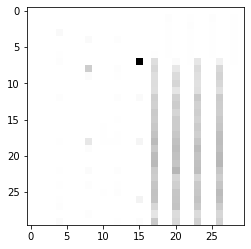

In [11]:
plt.imshow(test_pixels[200], cmap=plt.cm.binary)

In [12]:
def get_actual(symbol, limit=10):
    _dates=[]
    _action=[]
    _change = 0
    _records=dao.get_records(symbol, limit=limit+1)[::-1]
    for i, record in enumerate(_records):
        _dates.append(record["date"])
        if i + 1< len(_records):
            _change += 1 if record["data3"] < _records[i +1]["data3"] else -1
            _action.append(_change)

    if _dates:
        _dates.pop()

    return _dates, _action

In [18]:
import traceback
def get_prediction(symbol, limit=10):
    _dates=[]
    _action=[]
    _change = 0
    try:
        for _r in reversed(dao.get_records(symbol, limit=limit+1)):
            _date = _r["date"]
            _dates.append(_date)

            _record=dm.get_symbol_data(symbol, date=_date)

            _tmp = np.argmax(model.predict(_record))
            _change += 1 if _tmp == 1 else -1
            _action.append(_change)

    except Exception as e:
        print(e)
        traceback.print_exc()

    if _dates and _action:
        _dates.pop()
        _action.pop()
    
    return _dates, _action

In [19]:
def plot(x, y, z, symbol):
    import matplotlib
    from matplotlib import pyplot
    from matplotlib import dates
    import datetime

    converted_dates = list(map(datetime.datetime.strptime, x, len(x)*['%Y-%m-%d']))
    x_axis = converted_dates
    formatter = dates.DateFormatter('%Y-%m-%d')

    y_axis = y
    z_axis = z

    pyplot.figure(figsize=(10, 6))
    title_obj = pyplot.title(symbol)
    pyplot.setp(title_obj, color='white')
    
    pyplot.plot( x_axis, y_axis, label="Actual" )

    pyplot.plot( x_axis, z_axis, label="Prediction" )

    ax = pyplot.gcf().axes[0] 
    ax.xaxis.set_major_formatter(formatter)
    pyplot.gcf().autofmt_xdate(rotation=25)

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    pyplot.legend()
    pyplot.show()

In [20]:
def normalize(y, z):
    min_y = abs(min(y))
    min_z = abs(min(z))

    offset = min_y if min_y > min_z else min_z

    y = [_y + offset for _y in y]
    z = [_z + offset for _z in z]

    return y, z

In [21]:
def compare(symbol, limit=10):
    x, y = get_actual(symbol, limit)
    _, z = get_prediction(symbol, limit)

    if y and z:
        y, z = normalize(y, z)
        plot(x, y, z, symbol)

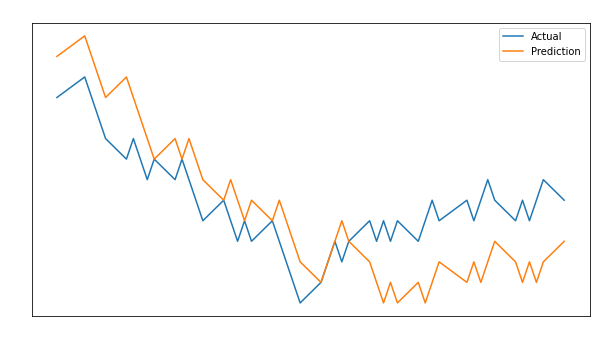

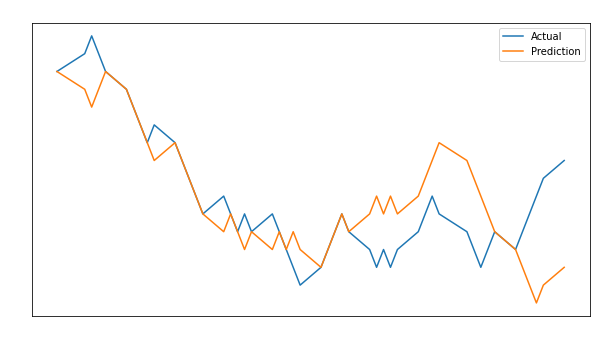

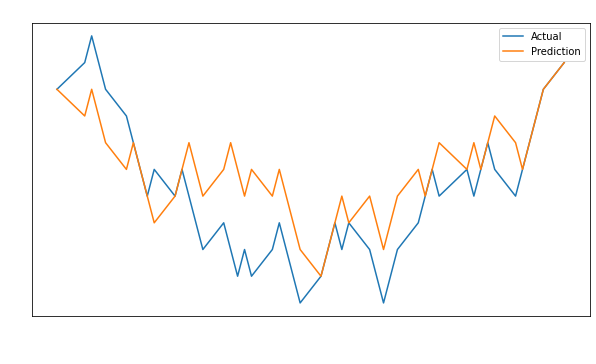

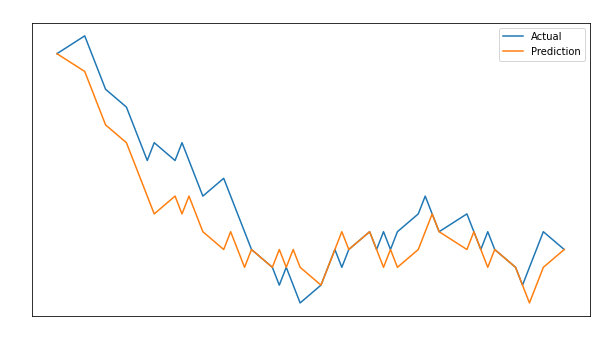

KeyboardInterrupt: 

In [22]:
for symbol in dao.get_symbols_list()[::-1][:25]:
    compare(symbol, 50)